In [409]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format

import pylab as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalizacion
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

#%matplotlib inline

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LogisticRegression as LogReg

from sklearn.svm import SVR

#!pip install xgboost
#!pip install catboost
#!pip install lightgbm
#!pip install h2o

from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR

import h2o
from h2o.automl import H2OAutoML

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge

In [2]:
def machine_learning():
    
    modelos = {'LinReg':LinReg(), 'Lasso':Lasso(), 'Ridge':Ridge(), 'Elastic':ElasticNet(), 'LogReg':LogReg(), 'RFR':RFR(), 
               'ETR':ETR(), 'SVR':SVR(), 'CTR':CTR(), 'XGBR':XGBR(), 'GBR':GBR(), 'LGBMR':LGBMR(), 'GNB':GaussianNB(),
              'RegBR':linear_model.BayesianRidge(), 'KNN':KNeighborsClassifier(n_neighbors=2),'Cat':CatBoostRegressor(), 
               'SGD':SGDRegressor(), 'KerRid':KernelRidge()}
    
    nombres = ['LinReg', 'Lasso', 'Ridge', 'Elastic', 'LogReg', 'RFR', 'ETR', 'SVR', 'CTR', 'XGBR', 'GBR', 'LGBMR', 'GNB',
              'RegBR', 'KNN','Cat', 'SGD', 'KerRid']
    
    RMSE = []
    R2_test = []
    R2_train = []

    resumen_modelos = pd.DataFrame()

    for m in modelos:
        
        if m == 'CTR' or m == 'Cat':

            mod = modelos[m]
            mod.fit(X_train, y_train, verbose=False)

            y_pred=mod.predict(X_test)
            error = mse(y_test, y_pred, squared=False)

            y_pred = mod.predict(X_test)
            R2_ts = mod.score(X_test, y_test)
            y_pred = mod.predict(X_train) 
            R2_tr = mod.score(X_train, y_train)

            RMSE.append(int(error))
            R2_test.append(R2_ts)
            R2_train.append(R2_tr)
            
        else:
            
            mod = modelos[m]
            mod.fit(X_train, y_train)

            y_pred=mod.predict(X_test)
            error = mse(y_test, y_pred, squared=False)

            y_pred = mod.predict(X_test)
            R2_ts = mod.score(X_test, y_test)
            y_pred = mod.predict(X_train) 
            R2_tr = mod.score(X_train, y_train)

            RMSE.append(int(error))
            R2_test.append(R2_ts)
            R2_train.append(R2_tr)

    resumen_modelos['Modelo'] = nombres
    resumen_modelos['RMSE'] = RMSE
    resumen_modelos['R2_test'] = R2_test
    resumen_modelos['R2_train'] = R2_train
    
    dict_errores = dict(zip(nombres, RMSE))
    best = list(dict_errores.keys())[list(dict_errores.values()).index(min(RMSE))] 
    
    modelo = modelos[best]
    
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_test)
    R2_test = modelo.score(X_test, y_test)
    y_pred = modelo.predict(X_train) 
    R2_train = modelo.score(X_train, y_train)
    
    error = round(min(RMSE),2)
    R2_train = round(R2_train, 4)
    R2_test = round(R2_test, 4)
    
    if R2_train > (1.15*R2_test):
        print(f'Best Model: {best}, RMSE = {error}, R2_train = {R2_train}, R2_test = {R2_test}, OVERFITING (modifica datos)')
    
    elif R2_train > R2_test:
        print(f'Best Model: {best}, RMSE = {error}, R2_train = {R2_train}, R2_test = {R2_test}, LO NORMAL')
    
    elif R2_train < R2_test:
        print(f'Best Model: {best}, RMSE = {error}, R2_train = {R2_train}, R2_test = {R2_test}, UNDERFITING (dame más datos)')
        
    return resumen_modelos

In [611]:
machine_learning()

Best Model: RFR, RMSE = 34031, R2_train = 0.8304, R2_test = 0.6249, OVERFITING (modifica datos)


,Modelo,RMSE,R2_test,R2_train
0,LinReg,34882454017196920,-382196332917268703870976.0000,0.7119
1,Lasso,60405,-0.1461,0.7118
2,Ridge,36205,0.5883,0.6656
3,Elastic,47201,0.3002,0.2696
4,LogReg,52665,0.0500,0.2825
5,RFR,34031,0.6362,0.8337
6,ETR,36204,0.5883,0.8839
7,SVR,56432,-0.0003,-0.0196
8,CTR,38595,0.5321,0.8375
9,XGBR,38350,0.5380,0.8690


## 1 - Obtener Datos

In [2]:
data = pd.read_csv('./salaries_data.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005,RO,0,US,L


In [3]:
# Importo el Test para crear predicción luego

In [3]:
test = pd.read_csv('./test.csv')
test.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,US,100,US,L
2,2020,MI,FT,Data Analyst,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,IN,100,IN,L


## 2 - EDA

In [5]:
data['work_year'].value_counts() # Está OK

2022    263
2021    181
2020     56
Name: work_year, dtype: int64

In [6]:
data['experience_level'].value_counts() # Está OK

SE    243
MI    172
EN     65
EX     20
Name: experience_level, dtype: int64

In [7]:
data['employment_type'].value_counts() # Está OK

FT    484
PT      8
CT      4
FL      4
Name: employment_type, dtype: int64

In [8]:
data['job_title'].value_counts() # Está OK, PERO YO RENOMBRARÍA CATEGORÍAS... ¿OTHERS?

Data Scientist                              121
Data Engineer                               111
Data Analyst                                 81
Machine Learning Engineer                    31
Research Scientist                           12
Data Science Manager                         12
Data Architect                                8
Machine Learning Scientist                    7
Data Analytics Manager                        7
Big Data Engineer                             7
Director of Data Science                      7
ML Engineer                                   6
Lead Data Engineer                            6
Principal Data Scientist                      6
Applied Data Scientist                        5
Data Engineering Manager                      5
Data Science Consultant                       5
AI Scientist                                  5
BI Data Analyst                               5
Head of Data                                  4
Business Data Analyst                   

In [9]:
data['employee_residence'].value_counts() # Está OK, PERO IDEM, RENOMBRAR...¿?

US    278
GB     38
IN     25
CA     24
DE     19
FR     14
ES     13
GR     11
PK      6
PT      6
BR      5
NL      4
JP      4
VN      3
PL      3
AT      3
TR      3
AE      3
RO      2
BE      2
NG      2
AU      2
RU      2
IT      2
SI      2
MY      1
BO      1
HN      1
IE      1
MT      1
HU      1
RS      1
MD      1
IR      1
LU      1
DZ      1
MX      1
PR      1
CZ      1
EE      1
HK      1
BG      1
UA      1
NZ      1
JE      1
CL      1
CH      1
KE      1
SG      1
Name: employee_residence, dtype: int64

In [10]:
data['remote_ratio'].value_counts() # Está OK

100    320
0      102
50      78
Name: remote_ratio, dtype: int64

In [11]:
data['company_location'].value_counts() # Está OK, PERO IDEM, RENOMBRAR...¿?

US    296
GB     41
CA     25
DE     23
IN     19
FR     12
ES     12
GR     10
JP      4
NL      4
PT      4
LU      3
AE      3
AT      3
PL      3
PK      3
TR      3
CH      2
AU      2
BR      2
NG      2
SI      2
BE      2
MT      1
IR      1
DZ      1
HU      1
CZ      1
HN      1
RO      1
CL      1
EE      1
UA      1
NZ      1
DK      1
CN      1
KE      1
VN      1
MX      1
IE      1
AS      1
MD      1
SG      1
Name: company_location, dtype: int64

In [12]:
data['company_size'].value_counts() # Está OK

M    273
L    165
S     62
Name: company_size, dtype: int64

In [13]:
data.info() # No hay nulos, tenemos 3 enteros y 6 categóricas... ¿Codificar? Dejamos así de momento a ver qué pasa.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary_in_usd       500 non-null    int64 
 5   employee_residence  500 non-null    object
 6   remote_ratio        500 non-null    int64 
 7   company_location    500 non-null    object
 8   company_size        500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


### Columnas numéricas

### Normalizamos

In [14]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols = ['work_year', 'remote_ratio']

In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

data[numeric_cols]=scaler.fit_transform(data[numeric_cols])

data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0.857874,SE,FT,Data Engineer,140250,US,0.697464,US,M
1,0.857874,SE,FT,Data Engineer,135000,US,0.697464,US,M
2,-0.606075,MI,FT,BI Data Analyst,100000,US,0.697464,US,M
3,-0.606075,MI,CT,ML Engineer,270000,US,0.697464,US,L
4,-0.606075,MI,FT,Data Engineer,26005,RO,-1.775814,US,L


### Miramos Correlaciones

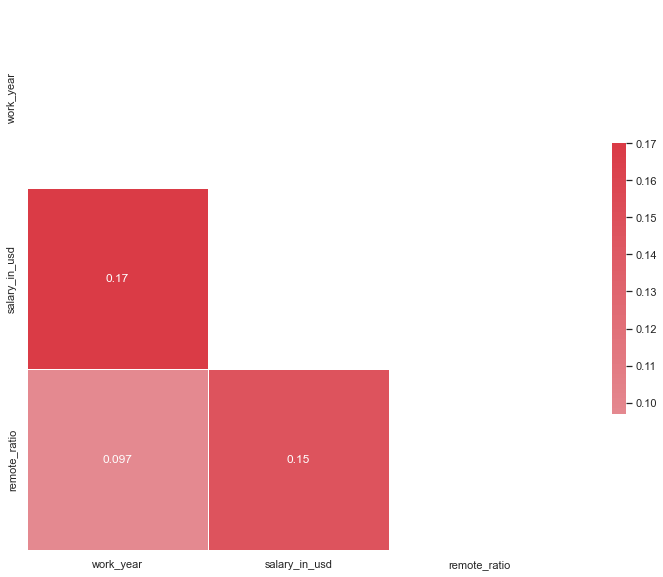

In [16]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});   # No hay correlaciones, NEXT

### Others en las columnas categóricas

In [53]:
def limpieza(df, col, n): 
    
    top = df[col].value_counts().head(n).index

    lista_corregida = []
    for title in df[col]:
        if title in top:
            lista_corregida.append(title)
        else:
            lista_corregida.append('Others')

    df[col] = lista_corregida
    
    return df

In [20]:
limpieza(data, 'employee_residence', 10)
limpieza(data, 'job_title', 11)
limpieza(data, 'company_location', 11)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0.857874,SE,FT,Data Engineer,140250,US,0.697464,US,M
1,0.857874,SE,FT,Data Engineer,135000,US,0.697464,US,M
2,-0.606075,MI,FT,Others,100000,US,0.697464,US,M
3,-0.606075,MI,CT,Others,270000,US,0.697464,US,L
4,-0.606075,MI,FT,Data Engineer,26005,Others,-1.775814,US,L
...,...,...,...,...,...,...,...,...,...
495,0.857874,SE,FT,Data Engineer,100000,US,0.697464,US,M
496,-0.606075,EN,FT,Big Data Engineer,5882,IN,-1.775814,CH,L
497,0.857874,SE,FT,Data Architect,90700,CA,0.697464,CA,M
498,-0.606075,MI,FT,Data Engineer,82528,GB,0.697464,GB,L


In [19]:
data['job_title'].value_counts()

Data Scientist                121
Data Engineer                 111
Others                         96
Data Analyst                   81
Machine Learning Engineer      31
Research Scientist             12
Data Science Manager           12
Data Architect                  8
Machine Learning Scientist      7
Data Analytics Manager          7
Big Data Engineer               7
Director of Data Science        7
Name: job_title, dtype: int64

In [21]:
data['employee_residence'].value_counts()

US        278
Others     66
GB         38
IN         25
CA         24
DE         19
FR         14
ES         13
GR         11
PK          6
PT          6
Name: employee_residence, dtype: int64

### Hacemos LabelEncoder...

In [23]:
list(data.select_dtypes(exclude=["int64", 'float64']).columns)

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

In [24]:
from sklearn.preprocessing import LabelEncoder

for col in list(data.select_dtypes(exclude=["int64", 'float64']).columns):
    data[col] = LabelEncoder().fit_transform(data[col])
    
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0.857874,3,2,4,140250,10,0.697464,11,1
1,0.857874,3,2,4,135000,10,0.697464,11,1
2,-0.606075,2,2,10,100000,10,0.697464,11,1
3,-0.606075,2,0,10,270000,10,0.697464,11,0
4,-0.606075,2,2,4,26005,7,-1.775814,11,0
...,...,...,...,...,...,...,...,...,...
495,0.857874,3,2,4,100000,10,0.697464,11,1
496,-0.606075,0,2,0,5882,6,-1.775814,9,0
497,0.857874,3,2,3,90700,0,0.697464,0,1
498,-0.606075,2,2,4,82528,4,0.697464,4,0


## 3 - Definir Problema

#### Queremos predecir salary_in_usd. Es un número -> Usaremos Regresión.

### Importaciones

### Hacemos SPLIT del data

In [26]:
X = data.drop('salary_in_usd', axis=1)

y = data.salary_in_usd

X.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,0.857874,3,2,4,10,0.697464,11,1
1,0.857874,3,2,4,10,0.697464,11,1
2,-0.606075,2,2,10,10,0.697464,11,1
3,-0.606075,2,0,10,10,0.697464,11,0
4,-0.606075,2,2,4,7,-1.775814,11,0


In [27]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 8), (100, 8), (400,), (100,))

## 4 - Proceso

### Inicializamos todo

In [28]:
# Regresión Lineal
linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()

# Support Vector Regressor
svr=SVR()

# Random Forest
rfr=RFR()
etr=ETR()

# Boosting
gbr=GBR()
xgbr=XGBR()
ctr=CTR()
lgbmr=LGBMR()

### Entrenamos

In [29]:
# Regresión Lineal
linreg.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)

# SVR
svr.fit(X_train, y_train)

# rfr y etr
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

# boosting
gbr.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
ctr.fit(X_train, y_train, verbose=0)
lgbmr.fit(X_train, y_train)

LGBMRegressor()

### Predecimos

In [30]:
linreg.predict(X_test)[:10]

array([150827.61468822,  55223.18108971, 128689.19537597, 128404.65784331,
       128404.65784331, 144115.81829414, 127381.45934705, 138512.61724746,
        47995.57605773,  -8955.35476107])

In [31]:
lasso.predict(X_test)[:10]

array([150826.37715001,  55228.25692032, 128690.53836004, 128404.19513054,
       128404.19513054, 144113.26980736, 127378.70071174, 138511.90363975,
        47992.9813554 ,  -8949.92178801])

In [32]:
ridge.predict(X_test)[:10]

array([150711.52680878,  55387.29959024, 128695.7928653 , 128387.07071077,
       128387.07071077, 144056.52784708, 127297.45131539, 138512.14381852,
        47821.67487509,  -8821.93339101])

In [33]:
elastic.predict(X_test)[:10]

array([141203.00792395,  78995.10884675, 131733.39499286, 126807.91473938,
       126807.91473938, 131621.5605939 , 114605.44898563, 136087.46458085,
        42420.88699874,  14523.90789597])

In [34]:
svr.predict(X_test)[:10]

array([101834.11519626, 101821.74988914, 101833.21263895, 101829.6597926 ,
       101829.6597926 , 101775.19885144, 101755.71672514, 101835.12825001,
       101749.67479046, 101740.42519615])

In [35]:
rfr.predict(X_test)[:10]

array([167828.25649573,  63941.5304902 , 120795.73468254, 108364.66551547,
       108364.66551547,  63728.78      ,  87018.42      , 223810.74697643,
        85879.22285714,  52944.92      ])

In [36]:
etr.predict(X_test)[:10]

array([160000.        ,  60000.        , 121700.        , 107853.74074074,
       107853.74074074,  94665.        ,  94665.        , 239760.        ,
        84200.        ,  49268.        ])

In [37]:
gbr.predict(X_test)[:10]

array([159019.10752029,  57225.40592245, 140997.88560308, 110809.37686095,
       110809.37686095,  67825.19828997, 102195.05886287, 200334.54407675,
        86813.79266137,  43613.11049932])

In [38]:
xgbr.predict(X_test)[:10]

array([162508.08 ,  60021.277, 121076.58 , 107964.35 , 107964.35 ,
        51726.094,  93875.84 , 238421.86 ,  83897.91 ,  48255.766],
      dtype=float32)

In [39]:
ctr.predict(X_test)[:10]

array([161511.89455104,  52397.97382918, 125522.00747151, 107739.59236867,
       107739.59236867,  59470.80044043, 103431.77123517, 228085.77657484,
        84253.47885886,  54493.87727295])

In [40]:
lgbmr.predict(X_test)[:10]

array([163153.02828707,  62680.28141465, 128117.18848152, 111025.08403666,
       111025.08403666,  53825.21310004,  85338.07388017, 180172.88573209,
        92280.70878316,  60236.96246263])

## Evalución

In [41]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
# regresion lineal

y_pred=linreg.predict(X_test)

mse(y_test, y_pred, squared=False)

56110.096302296

In [43]:
# lasso

y_pred=lasso.predict(X_test)

mse(y_test, y_pred, squared=False) 

56108.58072700922

In [44]:
# ridge

y_pred=ridge.predict(X_test)

mse(y_test, y_pred, squared=False)

55972.979051160924

In [45]:
# elastic

y_pred=elastic.predict(X_test)

mse(y_test, y_pred, squared=False)

53329.259977787515

In [46]:
# rfr

y_pred=rfr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

54874.209810627704

In [47]:
# etr

y_pred=etr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

59969.56406757176

In [48]:
# svr

y_pred=svr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

63052.95513161623

In [49]:
# boosting

y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

60686.93285998911

In [50]:
# crt

y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

55672.599013056315

In [51]:
# EL MEJOR ES ELASTIC

### Aplicamos las modificaciones al TEST

In [52]:
test.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,US,100,US,L
2,2020,MI,FT,Data Analyst,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,IN,100,IN,L


In [53]:
numeric_cols = test.select_dtypes(include=np.number).columns.tolist()
numeric_cols = ['work_year', 'remote_ratio']

In [54]:
scaler=StandardScaler()

test[numeric_cols]=scaler.fit_transform(test[numeric_cols])

test.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,-1.873027,SE,FT,Machine Learning Scientist,JP,-1.608265,JP,S
1,-1.873027,MI,FT,Lead Data Analyst,US,0.798509,US,L
2,-1.873027,MI,FT,Data Analyst,US,0.798509,US,L
3,-1.873027,MI,FT,Machine Learning Engineer,CN,-1.608265,CN,M
4,-1.873027,MI,FT,Product Data Analyst,IN,0.798509,IN,L


In [55]:
limpieza(test, 'job_title', 11)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,-1.873027,SE,FT,Others,JP,-1.608265,JP,S
1,-1.873027,MI,FT,Others,US,0.798509,US,L
2,-1.873027,MI,FT,Data Analyst,US,0.798509,US,L
3,-1.873027,MI,FT,Machine Learning Engineer,CN,-1.608265,CN,M
4,-1.873027,MI,FT,Others,IN,0.798509,IN,L
...,...,...,...,...,...,...,...,...
102,0.872369,SE,FT,Data Analyst,US,0.798509,US,M
103,0.872369,SE,FT,Data Architect,US,0.798509,US,M
104,0.872369,SE,FT,Data Scientist,US,0.798509,US,M
105,0.872369,EN,FT,Data Analyst,CA,-1.608265,CA,M


In [56]:
limpieza(test, 'employee_residence', 10)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,-1.873027,SE,FT,Others,JP,-1.608265,JP,S
1,-1.873027,MI,FT,Others,US,0.798509,US,L
2,-1.873027,MI,FT,Data Analyst,US,0.798509,US,L
3,-1.873027,MI,FT,Machine Learning Engineer,Others,-1.608265,CN,M
4,-1.873027,MI,FT,Others,IN,0.798509,IN,L
...,...,...,...,...,...,...,...,...
102,0.872369,SE,FT,Data Analyst,US,0.798509,US,M
103,0.872369,SE,FT,Data Architect,US,0.798509,US,M
104,0.872369,SE,FT,Data Scientist,US,0.798509,US,M
105,0.872369,EN,FT,Data Analyst,CA,-1.608265,CA,M


In [57]:
limpieza(test, 'company_location', 11)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,-1.873027,SE,FT,Others,JP,-1.608265,JP,S
1,-1.873027,MI,FT,Others,US,0.798509,US,L
2,-1.873027,MI,FT,Data Analyst,US,0.798509,US,L
3,-1.873027,MI,FT,Machine Learning Engineer,Others,-1.608265,Others,M
4,-1.873027,MI,FT,Others,IN,0.798509,IN,L
...,...,...,...,...,...,...,...,...
102,0.872369,SE,FT,Data Analyst,US,0.798509,US,M
103,0.872369,SE,FT,Data Architect,US,0.798509,US,M
104,0.872369,SE,FT,Data Scientist,US,0.798509,US,M
105,0.872369,EN,FT,Data Analyst,CA,-1.608265,CA,M


In [58]:
from sklearn.preprocessing import LabelEncoder

for col in list(test.select_dtypes(exclude=["int64", 'float64']).columns):
    test[col] = LabelEncoder().fit_transform(test[col])
    
test

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,-1.873027,3,1,9,7,-1.608265,8,2
1,-1.873027,2,1,9,10,0.798509,11,0
2,-1.873027,2,1,2,10,0.798509,11,0
3,-1.873027,2,1,8,8,-1.608265,10,1
4,-1.873027,2,1,9,5,0.798509,6,0
...,...,...,...,...,...,...,...,...
102,0.872369,3,1,2,10,0.798509,11,1
103,0.872369,3,1,3,10,0.798509,11,1
104,0.872369,3,1,6,10,0.798509,11,1
105,0.872369,0,1,2,0,-1.608265,0,1


In [59]:
test.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,-1.873027,3,1,9,7,-1.608265,8,2
1,-1.873027,2,1,9,10,0.798509,11,0
2,-1.873027,2,1,2,10,0.798509,11,0
3,-1.873027,2,1,8,8,-1.608265,10,1
4,-1.873027,2,1,9,5,0.798509,6,0


In [60]:
elastic.predict(test)

array([112521.22866173, 151355.0309614 , 118876.60651625, 113317.75267522,
       108814.75194072,  97830.40986219, 129596.22866036,  55569.01920991,
       102661.59778612, 138719.8510286 ,  97944.10923564, 144248.20419268,
        46357.99941721,  57857.22885889, 123198.37259918,  57757.18268949,
        93481.32539774, 158796.60266336,  26860.20549879,  22493.19215043,
       136642.23377627,  71518.64671601,  83689.12476419, 165814.60415329,
        74118.22317682,  99837.43853186,  99876.55900126, 161857.90397947,
       118982.16789048, 135973.65551096, 114757.44089042, 114470.33871792,
        54440.01177794, 108510.52744946, 103383.13171281,  50819.86847912,
       161174.82923256, 103294.30643403,  45213.80168529, 174000.07225498,
        59330.97474973,  95128.93430092, 126318.17821821, 155440.97257203,
       107378.95235603, 152872.68291322, 119909.86660323,  26654.70200235,
       114470.33871792, 105190.63299497, 119998.69188201, 116373.4078487 ,
       136630.98814666, 1

In [61]:
test['salary_in_usd'] = list(elastic.predict(test))

In [62]:
test.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,-1.873027,3,1,9,7,-1.608265,8,2,112521.228662
1,-1.873027,2,1,9,10,0.798509,11,0,151355.030961
2,-1.873027,2,1,2,10,0.798509,11,0,118876.606516
3,-1.873027,2,1,8,8,-1.608265,10,1,113317.752675
4,-1.873027,2,1,9,5,0.798509,6,0,108814.751941


In [63]:
list(test.columns)[:8]

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [64]:
cols_drop = list(test.columns)[:8]

sample = test.drop(cols_drop, axis = 1, inplace = False)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample.head()

,id,salary_in_usd
0,0,112521.228662
1,1,151355.030961
2,2,118876.606516
3,3,113317.752675
4,4,108814.751941


In [65]:
#sample.to_csv('./sample2.csv', index=False)

In [581]:
machine_learning()

Best Model: RFR, RMSE = 34115, R2_train = 0.8333, R2_test = 0.6172, OVERFITING (modifica datos)


,Modelo,RMSE,R2_test,R2_train
0,LinReg,34882454017196920,-382196332917268703870976.0000,0.7119
1,Lasso,60405,-0.1461,0.7118
2,Ridge,36205,0.5883,0.6656
3,Elastic,47201,0.3002,0.2696
4,LogReg,52665,0.0500,0.2825
5,RFR,34115,0.6344,0.8304
6,ETR,37229,0.5646,0.8839
7,SVR,56432,-0.0003,-0.0196
8,CTR,38595,0.5321,0.8375
9,XGBR,38350,0.5380,0.8690


## Probamos con otra limpieza

In [257]:
data = pd.read_csv('./salaries_data.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005,RO,0,US,L


In [140]:
# NORMALIZAMOS

# numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
# numeric_cols = ['work_year', 'remote_ratio']

# scaler=StandardScaler()
# data[numeric_cols]=scaler.fit_transform(data[numeric_cols])

In [258]:
data['employment_type'].value_counts().head(6)

FT    484
PT      8
CT      4
FL      4
Name: employment_type, dtype: int64

In [260]:
test['employment_type'].value_counts().head(6)

FT    104
PT      2
CT      1
Name: employment_type, dtype: int64

In [261]:
limpieza(data, 'employee_residence', 6)
limpieza(data, 'job_title', 5)
limpieza(data, 'company_location', 6)
limpieza(data, 'employment_type', 2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,US,100,US,M
2,2021,MI,FT,Others,100000,US,100,US,M
3,2021,MI,Others,Others,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005,Others,0,US,L
...,...,...,...,...,...,...,...,...,...
495,2022,SE,FT,Data Engineer,100000,US,100,US,M
496,2021,EN,FT,Others,5882,IN,0,Others,L
497,2022,SE,FT,Others,90700,CA,100,CA,M
498,2021,MI,FT,Data Engineer,82528,GB,100,GB,L


In [262]:
### Probamos con get dummies...

cols_categoricas = list(data.select_dtypes(exclude=["int64", 'float64']).columns)
cols_categoricas

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

In [165]:
# data.employee_residence.value_counts()

In [263]:
data = pd.get_dummies(data, columns=cols_categoricas, drop_first = True)

In [264]:
data

,work_year,salary_in_usd,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_Others,employment_type_PT,job_title_Data Engineer,job_title_Data Scientist,...,employee_residence_Others,employee_residence_US,company_location_DE,company_location_FR,company_location_GB,company_location_IN,company_location_Others,company_location_US,company_size_M,company_size_S
0,2022,140250,100,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,2022,135000,100,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,2021,100000,100,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,2021,270000,100,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2021,26005,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2022,100000,100,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
496,2021,5882,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
497,2022,90700,100,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
498,2021,82528,100,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [265]:
X = data.drop('salary_in_usd', axis=1)
y = data.salary_in_usd

In [266]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 26), (100, 26), (400,), (100,))

In [267]:
machine_learning()

'Best Model: Error_Ridge = 50687.07232601489'

In [268]:
# Aplicamos modificaciones al Test
test = pd.read_csv('./test.csv')
test

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,US,100,US,L
2,2020,MI,FT,Data Analyst,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,IN,100,IN,L
...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,US,100,US,M
103,2022,SE,FT,Data Architect,US,100,US,M
104,2022,SE,FT,Data Scientist,US,100,US,M
105,2022,EN,FT,Data Analyst,CA,0,CA,M


In [130]:
# NORMALIZAMOS

# numeric_cols = test.select_dtypes(include=np.number).columns.tolist()
# numeric_cols = ['work_year', 'remote_ratio']

# scaler=StandardScaler()
# test[numeric_cols]=scaler.fit_transform(test[numeric_cols])

In [269]:
limpieza(test, 'employee_residence', 6) # No podemos hacer esto, coge distintos valores que en Data. Probamos con bucle.
limpieza(test, 'job_title', 5)
limpieza(test, 'company_location', 6)
limpieza(test, 'employment_type', 2)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Others,Others,0,Others,S
1,2020,MI,FT,Others,US,100,US,L
2,2020,MI,FT,Data Analyst,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,Others,0,Others,M
4,2020,MI,FT,Others,IN,100,IN,L
...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,US,100,US,M
103,2022,SE,FT,Others,US,100,US,M
104,2022,SE,FT,Data Scientist,US,100,US,M
105,2022,EN,FT,Data Analyst,CA,0,CA,M


In [102]:
# list(data['company_location'].value_counts().index) # Cogemos las etiquetas que nos han quedado ANTES del get.dummies en Data
# locations = ['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'NL', 'PT'] # Las copio quitando el OTHERS

# lista_corregida = []
# for loc in test['company_location']:
#     if loc in locations:
#         lista_corregida.append(loc)
#     else:
#         lista_corregida.append('Others')

# test['company_location'] = lista_corregida

In [104]:
# list(data['employee_residence'].value_counts().index)
# resis = ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR', 'PK', 'PT']

# lista_corregida = []
# for res in test['employee_residence']:
#     if loc in resis:
#         lista_corregida.append(res)
#     else:
#         lista_corregida.append('Others')

# test['employee_residence'] = lista_corregida

In [109]:
# list(data['job_title'].value_counts().index)
# jobs = ['Data Scientist','Data Engineer','Data Analyst','Machine Learning Engineer','Research Scientist',
#  'Data Science Manager','Data Architect','Machine Learning Scientist','Data Analytics Manager','Big Data Engineer',
#  'Director of Data Science']

# lista_corregida = []
# for job in test['job_title']:
#     if job in jobs:
#         lista_corregida.append(job)
#     else:
#         lista_corregida.append('Others')

# test['job_title'] = lista_corregida

In [270]:
cols_categoricas = list(test.select_dtypes(exclude=["int64", 'float64']).columns)
cols_categoricas

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

In [271]:
test = pd.get_dummies(test, columns=cols_categoricas, drop_first = True)

In [272]:
test

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_Others,employment_type_PT,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,...,employee_residence_Others,employee_residence_US,company_location_DE,company_location_FR,company_location_GB,company_location_IN,company_location_Others,company_location_US,company_size_M,company_size_S
0,2020,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,2020,100,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2020,100,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2020,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4,2020,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2022,100,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
103,2022,100,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
104,2022,100,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
105,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# No está cogiendo las mismas columnas en Test que en Data, ojo...

In [273]:
set1 = set(data.columns) 

In [274]:
set2 = set(test.columns)

In [275]:
set1.difference(set2) # Columnas problemáticas

{'salary_in_usd'}

In [276]:
rfr=RFR()
rfr.fit(X_train, y_train)
y_pred=rfr.predict(test)

In [277]:
test['salary_in_usd'] = list(rfr.predict(test))

In [278]:
test.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_Others,employment_type_PT,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,...,employee_residence_US,company_location_DE,company_location_FR,company_location_GB,company_location_IN,company_location_Others,company_location_US,company_size_M,company_size_S,salary_in_usd
0,2020,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,117146.220000
1,2020,100,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,148475.444444
2,2020,100,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,111428.500000
3,2020,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,44414.430000
4,2020,100,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,23493.830000


In [282]:
cols_drop = list(test.columns)[:26]

sample = test.drop(cols_drop, axis = 1, inplace = False)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample.head()

,id,salary_in_usd
0,0,117146.220000
1,1,148475.444444
2,2,111428.500000
3,3,44414.430000
4,4,23493.830000


In [283]:
sample.to_csv('./sample3.csv', index=False)

### Mejoramos modelo - EL MEJOR DE MOMENTO

In [383]:
data = pd.read_csv('./salaries_data.csv')
test = pd.read_csv('./test.csv')

In [384]:
concat = pd.concat([data, test], axis=0) # Unimos los DF para hacer las transformaciones(hay datos que no comparten...)
concat

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.0,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.0,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000.0,US,100,US,M
3,2021,MI,CT,ML Engineer,270000.0,US,100,US,L
4,2021,MI,FT,Data Engineer,26005.0,RO,0,US,L
...,...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,NaN,US,100,US,M
103,2022,SE,FT,Data Architect,NaN,US,100,US,M
104,2022,SE,FT,Data Scientist,NaN,US,100,US,M
105,2022,EN,FT,Data Analyst,NaN,CA,0,CA,M


In [385]:
for i in concat.job_title:
    if 'Engineer' in i:
        concat.job_title.replace({i: 'Data Engineer'}, inplace = True)
    elif 'Analy' in i:
        concat.job_title.replace({i: 'Data Analyst'}, inplace = True)
    elif 'Architect' in i:
        concat.job_title.replace({i: 'Data Architect'}, inplace = True)
    elif 'Scien' in i:
        concat.job_title.replace({i: 'Data Scientist'}, inplace = True)

In [386]:
concat['job_title'].value_counts()

Data Engineer                    230
Data Scientist                   224
Data Analyst                     127
Data Architect                    12
Head of Data                       5
Machine Learning Developer         3
ETL Developer                      2
Machine Learning Manager           1
3D Computer Vision Researcher      1
Data Specialist                    1
Head of Machine Learning           1
Name: job_title, dtype: int64

In [387]:
limpieza(concat, 'employee_residence', 16)
limpieza(concat, 'company_location', 13)
limpieza(concat, 'employment_type', 4)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.0,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.0,US,100,US,M
2,2021,MI,FT,Data Analyst,100000.0,US,100,US,M
3,2021,MI,CT,Data Engineer,270000.0,US,100,US,L
4,2021,MI,FT,Data Engineer,26005.0,Others,0,US,L
...,...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,NaN,US,100,US,M
103,2022,SE,FT,Data Architect,NaN,US,100,US,M
104,2022,SE,FT,Data Scientist,NaN,US,100,US,M
105,2022,EN,FT,Data Analyst,NaN,CA,0,CA,M


In [347]:
#NORMALIZAMOS

numeric_cols = concat.select_dtypes(include=np.number).columns.tolist()
numeric_cols = ['work_year', 'remote_ratio']

scaler=StandardScaler()
concat[numeric_cols]=scaler.fit_transform(concat[numeric_cols])

In [388]:
# Get Dummies

cols_categoricas = list(test.select_dtypes(exclude=["int64", 'float64']).columns)
cols_categoricas

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

In [389]:
concat = pd.get_dummies(concat, columns=cols_categoricas, drop_first = True)

In [390]:
data2 = concat[:500] # Me quedo con las filas del data

In [391]:
X = data2.drop('salary_in_usd', axis=1)
y = data2.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.99, test_size=0.01, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((495, 49), (5, 49), (495,), (5,))

In [392]:
machine_learning() 

'Best Model: SVR, RMSE = 17677.97, R2_train = -0.0201, R2_test = -0.0334, OVERFITING (modifica datos)'

In [399]:
test2 = concat[500:]

In [400]:
test3 = test2.drop(['salary_in_usd'], axis = 1, inplace = False)

In [401]:
svr=SVR()
svr.fit(X_train, y_train)
y_pred=svr.predict(test3)

In [396]:
svr.score(X_test, y_test) #r2

-0.03343990048108103

In [397]:
y_pred=svr.predict(X_train) #r2
svr.score(X_train, y_train)

-0.020090809375031826

In [402]:
len(y_pred)

107

In [403]:
test3['salary_in_usd'] = list(y_pred)

In [404]:
test3.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,job_title_Data Architect,...,company_location_IN,company_location_JP,company_location_NL,company_location_Others,company_location_PL,company_location_PT,company_location_US,company_size_M,company_size_S,salary_in_usd
0,2020,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,103159.830336
1,2020,100,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,103160.000057
2,2020,100,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,103160.000057
3,2020,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,103159.830233
4,2020,100,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,103159.999891


In [405]:
list(test3.columns)[:49]

cols_drop = list(test3.columns)[:49]

sample = test3.drop(cols_drop, axis = 1, inplace = False)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample.head()

,id,salary_in_usd
0,0,103159.830336
1,1,103160.000057
2,2,103160.000057
3,3,103159.830233
4,4,103159.999891


In [406]:
sample.to_csv('./sample9.csv', index=False)

### Nuevo modelo

In [176]:
data = pd.read_csv('./salaries_data.csv')
test = pd.read_csv('./test.csv')

concat = pd.concat([data, test], axis=0)

In [178]:
limpieza(concat, 'employee_residence', 16)
limpieza(concat, 'job_title', 18)
limpieza(concat, 'company_location', 13)
limpieza(concat, 'employment_type', 4)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.0,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.0,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000.0,US,100,US,M
3,2021,MI,CT,ML Engineer,270000.0,US,100,US,L
4,2021,MI,FT,Data Engineer,26005.0,Others,0,US,L
...,...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,NaN,US,100,US,M
103,2022,SE,FT,Data Architect,NaN,US,100,US,M
104,2022,SE,FT,Data Scientist,NaN,US,100,US,M
105,2022,EN,FT,Data Analyst,NaN,CA,0,CA,M


In [180]:
#NORMALIZAMOS

numeric_cols = concat.select_dtypes(include=np.number).columns.tolist()
numeric_cols = ['work_year', 'remote_ratio']

scaler=StandardScaler()
concat[numeric_cols]=scaler.fit_transform(concat[numeric_cols])

In [182]:
# Get Dummies

cols_categoricas = list(test.select_dtypes(exclude=["int64", 'float64']).columns)

concat = pd.get_dummies(concat, columns=cols_categoricas, drop_first = True)

In [199]:
print(list(concat.columns))

['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'job_title_BI Data Analyst', 'job_title_Big Data Engineer', 'job_title_Computer Vision Engineer', 'job_title_Data Analyst', 'job_title_Data Analytics Manager', 'job_title_Data Architect', 'job_title_Data Engineer', 'job_title_Data Science Consultant', 'job_title_Data Science Manager', 'job_title_Data Scientist', 'job_title_Director of Data Science', 'job_title_Lead Data Engineer', 'job_title_ML Engineer', 'job_title_Machine Learning Engineer', 'job_title_Machine Learning Scientist', 'job_title_Others', 'job_title_Principal Data Scientist', 'job_title_Research Scientist', 'employee_residence_CA', 'employee_residence_DE', 'employee_residence_ES', 'employee_residence_FR', 'employee_residence_GB', 'employee_residence_GR', 'employee_residence_IN', 'employee_residence_IT', 'employee_residence_JP', 'employee_resid

In [212]:
df1 = concat[['salary_in_usd', 'employee_residence_CA', 'employee_residence_DE', 'employee_residence_ES', 'employee_residence_FR', 'employee_residence_GB', 'employee_residence_GR', 'employee_residence_IN', 'employee_residence_JP', 'employee_residence_NL', 'employee_residence_Others', 'employee_residence_PL', 'employee_residence_PT', 'employee_residence_US', 'company_location_CA', 'company_location_DE', 'company_location_ES', 'company_location_FR', 'company_location_GB', 'company_location_GR', 'company_location_IN', 'company_location_JP', 'company_location_NL', 'company_location_Others', 'company_location_PL', 'company_location_PT', 'company_location_US']]

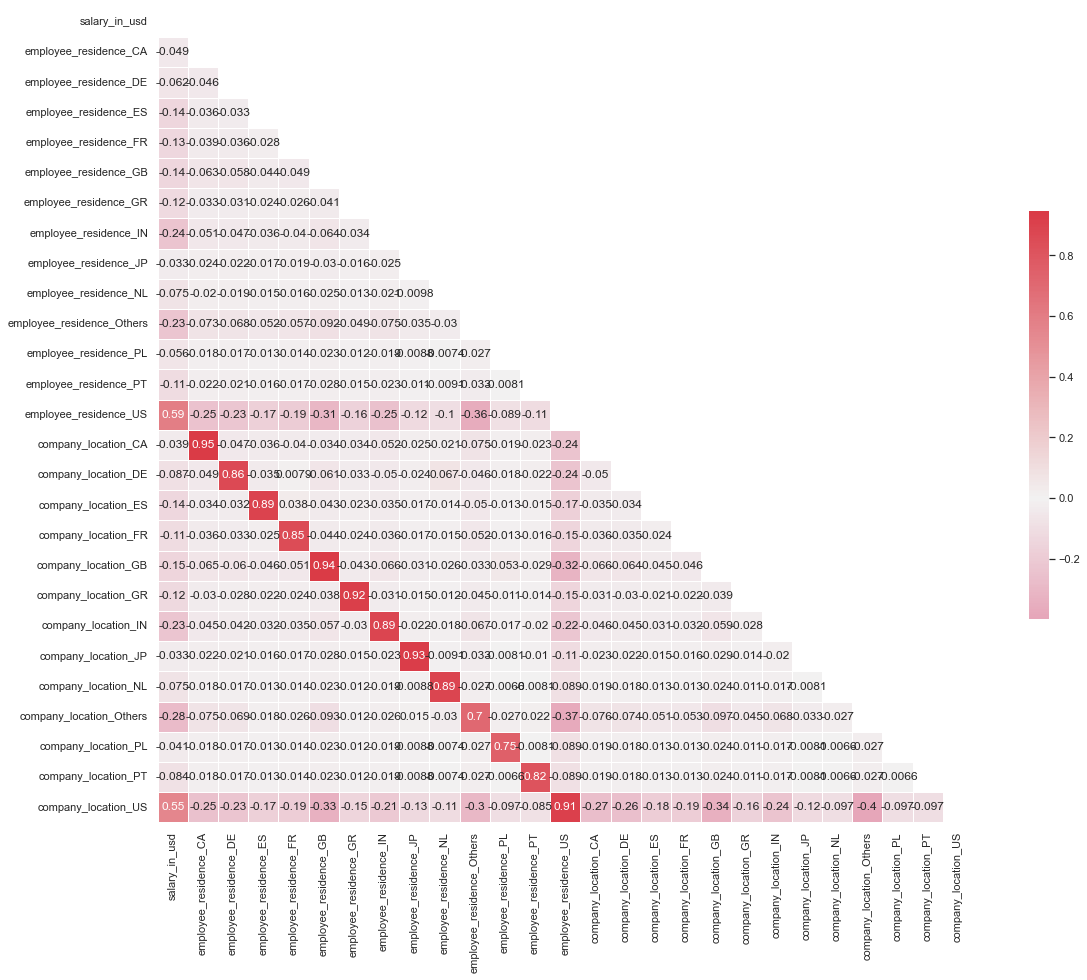

In [214]:
# buscando colinealidad

plt.figure(figsize=(20, 15))

sns.set(style='white')

mask=np.triu(np.ones_like(df1.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df1.corr(),
          mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [ ]:
# Hay mucha colinealidad entre varias variables. Procedemos a eliminar las de entorno 0'9 y baja correlación con salary_in_usd
# Columnas = employee_residence_NL, employee_residence_CA, employee_residence_ES, employee_residence_GB, employee_residence_GR 
# company_location_IN, company_location_JP, company_location_NL

In [215]:
cols_drop = ['employee_residence_NL', 'employee_residence_CA', 'employee_residence_ES', 'employee_residence_GB', 
            'employee_residence_GR', 'company_location_IN', 'company_location_JP', 'company_location_NL']

In [219]:
concat = concat.drop(cols_drop, axis=1)

In [234]:
data2 = concat[:500] # Me quedo con las filas del data

X = data2.drop('salary_in_usd', axis=1)
y = data2.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.99, test_size=0.01, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((495, 49), (5, 49), (495,), (5,))

In [235]:
machine_learning() 

'Best Model: lgbmr, RMSE = 13774.83, R2_train = 0.6699, R2_test = 0.9024, UNDERFITING (dame más datos)'

In [263]:
test2 = concat[500:].drop('salary_in_usd', axis=1)
test2

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_BI Data Analyst,job_title_Big Data Engineer,...,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_Others,company_location_PL,company_location_PT,company_location_US,company_size_M,company_size_S
0,-2.032024,-1.743615,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-2.032024,0.714862,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-2.032024,0.714862,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-2.032024,-1.743615,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,-2.032024,0.714862,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.859977,0.714862,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
103,0.859977,0.714862,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
104,0.859977,0.714862,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
105,0.859977,-1.743615,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [264]:
lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)
y_pred=lgbmr.predict(test2)

In [265]:
test2['salary_in_usd'] = list(lgbmr.predict(test2))

In [270]:
len(test2.columns)

50

In [277]:
list(test2.columns)[:49]

cols_drop = list(test2.columns)[:49]

sample = test2.drop(cols_drop, axis = 1, inplace = False)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample

,id,salary_in_usd
0,0,96182.884545
1,1,212884.559554
2,2,104805.812776
3,3,58657.365430
4,4,27613.998420
...,...,...
102,102,111580.684046
103,103,167661.261623
104,104,160936.816301
105,105,62091.696611


In [275]:
sample.to_csv('./sample5.csv', index=False)

### Seguimos Probando

In [490]:
data = pd.read_csv('./salaries_data.csv')
test = pd.read_csv('./test.csv')

concat = pd.concat([data, test], axis=0)

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary_in_usd       500 non-null    int64 
 5   employee_residence  500 non-null    object
 6   remote_ratio        500 non-null    int64 
 7   company_location    500 non-null    object
 8   company_size        500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [439]:
for col in list(data.select_dtypes(exclude=["int64", 'float64']).columns):
    data[col] = LabelEncoder().fit_transform(data[col])

In [491]:
for col in list(concat.select_dtypes(exclude=["int64", 'float64']).columns):
    concat[col] = LabelEncoder().fit_transform(concat[col])

In [415]:
concat.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,3,2,17,140250.0,55,100,48,1
1,2022,3,2,17,135000.0,55,100,48,1
2,2021,2,2,5,100000.0,55,100,48,1
3,2021,2,0,36,270000.0,55,100,48,0
4,2021,2,2,17,26005.0,47,0,48,0


In [410]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [451]:
# varias variables
x=sm.add_constant(data[[
        'work_year', 
        'experience_level', 
        #'employment_type', 
        'job_title', 
        'employee_residence', 
        #'remote_ratio',
        #'company_location', 
        'company_size'
    
]].apply(lambda x: x.fillna(x.mean()))

)

y=data['salary_in_usd']


modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     43.25
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           5.66e-37
Time:                        19:29:24   Log-Likelihood:                -6193.6
No. Observations:                 500   AIC:                         1.240e+04
Df Residuals:                     494   BIC:                         1.242e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.409e+07   8.45e+06     -1.668      0.096   -3.07e+07    2.51e+06
work_year           6976.3256   4182.345      1.668      0.096   -1241.053    1.52e+04
experience_level    1.276e+04   2822.606      4.521      0.000    7216.428    1.83e+04
job_title           1202.2391    268.040      4.485      0.000     675.600    1728.878
employee_residence  1848.7245    171.140     10.802      0.000    1512.472    2184.977
company_size       -1.451e+04   4111.284     -3.530      0.000   -2.26e+04   -6434.923
==============================================================================
Omnibus:                      203.498   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.339
Skew:                           1.704   Prob(JB):                    6.42e-243
Kurtosis:                       9.475   Cond. No.                     6.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [492]:
concat.drop(columns = ['company_location', 'employment_type', 'remote_ratio'], inplace=True)

In [493]:
for col in list(concat.select_dtypes(exclude=["int64", 'float64']).columns):
    concat[col] = LabelEncoder().fit_transform(concat[col])

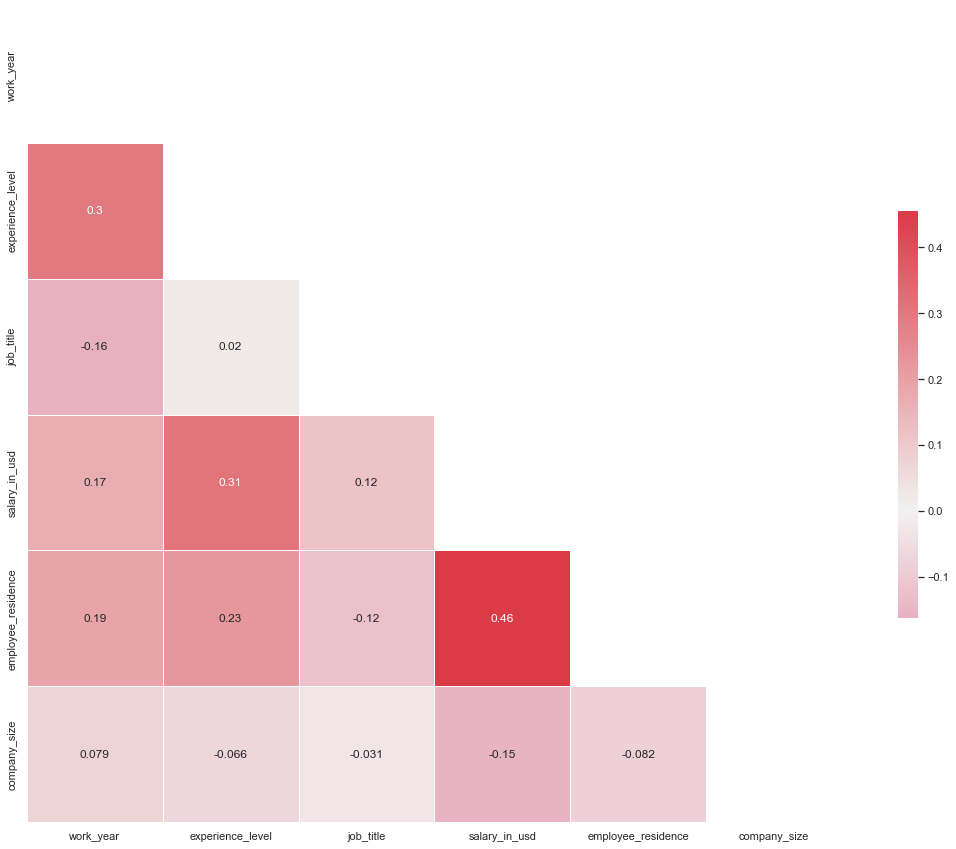

In [454]:
# buscando colinealidad

plt.figure(figsize=(20, 15))

sns.set(style='white')

mask=np.triu(np.ones_like(concat.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(concat.corr(),
          mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5, 
          cbar_kws={'shrink': 0.5}); # Nos podemos cargar 

In [508]:
data2 = concat[:500] # Me quedo con las filas del data

X = data2.drop('salary_in_usd', axis=1)
y = data2.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.9, test_size=0.1, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((450, 5), (50, 5), (450,), (50,))

In [501]:
machine_learning() 

'Best Model: gbr, RMSE = 33121.46, R2_train = 0.7559, R2_test = 0.7012, LO NORMAL'

In [503]:
test2 = concat[500:].drop('salary_in_usd', axis=1)
test2

,work_year,experience_level,job_title,employee_residence,company_size
0,2020,3,41,32,2
1,2020,2,32,55,0
2,2020,2,12,55,0
3,2020,2,38,11,1
4,2020,2,47,27,0
...,...,...,...,...,...
102,2022,3,12,55,1
103,2022,3,16,55,1
104,2022,3,22,55,1
105,2022,0,12,8,1


In [504]:
gbr=GBR()
gbr.fit(X_train, y_train)
y_pred=gbr.predict(test2)

In [505]:
test2['salary_in_usd'] = list(y_pred)

In [506]:
list(test2.columns)[:5]

cols_drop = list(test2.columns)[:5]

sample = test2.drop(cols_drop, axis = 1, inplace = False)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample

,id,salary_in_usd
0,0,108415.005463
1,1,196482.534199
2,2,116603.879968
3,3,82004.923774
4,4,45514.490045
...,...,...
102,102,113055.558448
103,103,176237.384992
104,104,156233.198403
105,105,52494.510678


In [507]:
sample.to_csv('./sample10.csv', index=False)

### ¿Y con get dummies...?

In [74]:
data = pd.read_csv('./salaries_data.csv')
test = pd.read_csv('./test.csv')

concat = pd.concat([data, test], axis=0)

In [75]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005,RO,0,US,L


In [515]:
concat.drop(columns = ['company_location', 'employment_type', 'remote_ratio'], inplace=True)

In [516]:
# Get Dummies

cols_categoricas = list(concat.select_dtypes(exclude=["int64", 'float64']).columns)

concat = pd.get_dummies(concat, columns=cols_categoricas, drop_first = True)

In [524]:
data2 = concat[:500] # Me quedo con las filas del data

X = data2.drop('salary_in_usd', axis=1)
y = data2.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 111), (100, 111), (400,), (100,))

In [480]:
machine_learning() 

Learning rate set to 0.036638
0:	learn: 68817.9781907	total: 1.35ms	remaining: 1.35s
1:	learn: 67865.1755663	total: 2.73ms	remaining: 1.36s
2:	learn: 66835.9428952	total: 4.17ms	remaining: 1.39s
3:	learn: 65933.6091668	total: 5.6ms	remaining: 1.39s
4:	learn: 65170.1633490	total: 7.05ms	remaining: 1.4s
5:	learn: 64362.4953289	total: 9.4ms	remaining: 1.56s
6:	learn: 63542.3538230	total: 10.8ms	remaining: 1.54s
7:	learn: 62889.0960685	total: 12.3ms	remaining: 1.52s
8:	learn: 62160.7325074	total: 13.8ms	remaining: 1.51s
9:	learn: 61600.3757633	total: 15ms	remaining: 1.48s
10:	learn: 60906.0679284	total: 16.5ms	remaining: 1.48s
11:	learn: 60363.1748332	total: 18ms	remaining: 1.48s
12:	learn: 59731.1111579	total: 19.4ms	remaining: 1.47s
13:	learn: 59138.0577595	total: 21ms	remaining: 1.48s
14:	learn: 58595.8412137	total: 22.8ms	remaining: 1.5s
15:	learn: 58098.5993186	total: 24.3ms	remaining: 1.49s
16:	learn: 57562.6563455	total: 26.4ms	remaining: 1.53s
17:	learn: 57230.1817962	total: 27.3ms

162:	learn: 42242.7886027	total: 288ms	remaining: 1.48s
163:	learn: 42215.6205826	total: 291ms	remaining: 1.48s
164:	learn: 42129.2351956	total: 299ms	remaining: 1.51s
165:	learn: 42098.7231287	total: 301ms	remaining: 1.51s
166:	learn: 42032.4575840	total: 303ms	remaining: 1.51s
167:	learn: 42006.0882789	total: 305ms	remaining: 1.51s
168:	learn: 41967.3885720	total: 307ms	remaining: 1.51s
169:	learn: 41950.7907590	total: 308ms	remaining: 1.5s
170:	learn: 41928.6420298	total: 310ms	remaining: 1.5s
171:	learn: 41908.3704580	total: 312ms	remaining: 1.5s
172:	learn: 41861.0423832	total: 314ms	remaining: 1.5s
173:	learn: 41810.0956861	total: 317ms	remaining: 1.5s
174:	learn: 41777.7357410	total: 320ms	remaining: 1.51s
175:	learn: 41733.7125704	total: 323ms	remaining: 1.51s
176:	learn: 41703.8140093	total: 326ms	remaining: 1.52s
177:	learn: 41650.0561402	total: 329ms	remaining: 1.52s
178:	learn: 41622.4868416	total: 330ms	remaining: 1.51s
179:	learn: 41586.0600895	total: 332ms	remaining: 1.5

323:	learn: 36460.6391165	total: 589ms	remaining: 1.23s
324:	learn: 36415.9280312	total: 592ms	remaining: 1.23s
325:	learn: 36381.6586137	total: 594ms	remaining: 1.23s
326:	learn: 36348.5960681	total: 596ms	remaining: 1.23s
327:	learn: 36303.5559450	total: 597ms	remaining: 1.22s
328:	learn: 36278.8859879	total: 599ms	remaining: 1.22s
329:	learn: 36255.6338557	total: 600ms	remaining: 1.22s
330:	learn: 36247.8570550	total: 602ms	remaining: 1.22s
331:	learn: 36231.0736244	total: 604ms	remaining: 1.21s
332:	learn: 36222.2514984	total: 606ms	remaining: 1.21s
333:	learn: 36197.3506078	total: 608ms	remaining: 1.21s
334:	learn: 36166.6408826	total: 610ms	remaining: 1.21s
335:	learn: 36125.2844673	total: 611ms	remaining: 1.21s
336:	learn: 36073.4096814	total: 613ms	remaining: 1.21s
337:	learn: 36047.0209493	total: 615ms	remaining: 1.2s
338:	learn: 36034.5041755	total: 624ms	remaining: 1.22s
339:	learn: 35992.8659301	total: 627ms	remaining: 1.22s
340:	learn: 35985.3581044	total: 631ms	remaining:

475:	learn: 33145.3245597	total: 1.01s	remaining: 1.12s
476:	learn: 33126.2604994	total: 1.02s	remaining: 1.12s
477:	learn: 33108.2608780	total: 1.02s	remaining: 1.11s
478:	learn: 33099.2413309	total: 1.02s	remaining: 1.11s
479:	learn: 33094.6783086	total: 1.02s	remaining: 1.11s
480:	learn: 33089.5015062	total: 1.03s	remaining: 1.11s
481:	learn: 33080.3373298	total: 1.03s	remaining: 1.11s
482:	learn: 33075.7125264	total: 1.03s	remaining: 1.1s
483:	learn: 33048.6666603	total: 1.03s	remaining: 1.1s
484:	learn: 33017.3733229	total: 1.04s	remaining: 1.1s
485:	learn: 33003.0717677	total: 1.04s	remaining: 1.1s
486:	learn: 32997.8073040	total: 1.04s	remaining: 1.1s
487:	learn: 32976.8604491	total: 1.04s	remaining: 1.1s
488:	learn: 32963.1014419	total: 1.05s	remaining: 1.09s
489:	learn: 32947.7658094	total: 1.05s	remaining: 1.09s
490:	learn: 32899.0189777	total: 1.05s	remaining: 1.09s
491:	learn: 32892.8549313	total: 1.06s	remaining: 1.09s
492:	learn: 32875.1044597	total: 1.07s	remaining: 1.1s

660:	learn: 31062.9323482	total: 1.63s	remaining: 836ms
661:	learn: 31059.8983047	total: 1.63s	remaining: 834ms
662:	learn: 31050.2545292	total: 1.64s	remaining: 831ms
663:	learn: 31047.3002537	total: 1.64s	remaining: 829ms
664:	learn: 31038.2314941	total: 1.64s	remaining: 826ms
665:	learn: 31029.8014576	total: 1.64s	remaining: 824ms
666:	learn: 31027.2573572	total: 1.64s	remaining: 821ms
667:	learn: 31024.5478943	total: 1.65s	remaining: 818ms
668:	learn: 31017.0132998	total: 1.65s	remaining: 815ms
669:	learn: 31014.3962255	total: 1.65s	remaining: 813ms
670:	learn: 31000.2431935	total: 1.65s	remaining: 810ms
671:	learn: 30997.7220226	total: 1.65s	remaining: 808ms
672:	learn: 30992.7001186	total: 1.66s	remaining: 805ms
673:	learn: 30989.8884433	total: 1.66s	remaining: 804ms
674:	learn: 30987.3221306	total: 1.66s	remaining: 801ms
675:	learn: 30984.0274514	total: 1.67s	remaining: 800ms
676:	learn: 30970.7422142	total: 1.67s	remaining: 797ms
677:	learn: 30958.2356905	total: 1.67s	remaining

824:	learn: 29771.5453693	total: 2.76s	remaining: 585ms
825:	learn: 29747.2389135	total: 2.76s	remaining: 582ms
826:	learn: 29742.9347319	total: 2.76s	remaining: 578ms
827:	learn: 29740.8300968	total: 2.77s	remaining: 575ms
828:	learn: 29739.2073281	total: 2.77s	remaining: 571ms
829:	learn: 29735.0047798	total: 2.77s	remaining: 568ms
830:	learn: 29729.9625856	total: 2.77s	remaining: 564ms
831:	learn: 29704.8205386	total: 2.77s	remaining: 560ms
832:	learn: 29702.6317213	total: 2.78s	remaining: 557ms
833:	learn: 29679.8651470	total: 2.78s	remaining: 554ms
834:	learn: 29678.2442444	total: 2.78s	remaining: 550ms
835:	learn: 29676.4077763	total: 2.79s	remaining: 547ms
836:	learn: 29670.4665857	total: 2.81s	remaining: 547ms
837:	learn: 29665.0101294	total: 2.81s	remaining: 543ms
838:	learn: 29663.4997588	total: 2.81s	remaining: 540ms
839:	learn: 29661.7130188	total: 2.81s	remaining: 536ms
840:	learn: 29660.1983227	total: 2.82s	remaining: 532ms
841:	learn: 29658.1771158	total: 2.82s	remaining

983:	learn: 28938.9333668	total: 3.22s	remaining: 52.3ms
984:	learn: 28929.4341399	total: 3.22s	remaining: 49ms
985:	learn: 28914.8219347	total: 3.22s	remaining: 45.7ms
986:	learn: 28913.5101019	total: 3.22s	remaining: 42.5ms
987:	learn: 28912.0600934	total: 3.23s	remaining: 39.2ms
988:	learn: 28907.1303545	total: 3.23s	remaining: 35.9ms
989:	learn: 28884.6715160	total: 3.24s	remaining: 32.7ms
990:	learn: 28876.6171858	total: 3.24s	remaining: 29.4ms
991:	learn: 28866.6321269	total: 3.25s	remaining: 26.2ms
992:	learn: 28861.8716357	total: 3.25s	remaining: 22.9ms
993:	learn: 28853.5170393	total: 3.25s	remaining: 19.6ms
994:	learn: 28852.0016072	total: 3.25s	remaining: 16.4ms
995:	learn: 28828.6739402	total: 3.27s	remaining: 13.1ms
996:	learn: 28827.1367282	total: 3.28s	remaining: 9.86ms
997:	learn: 28820.8139122	total: 3.28s	remaining: 6.57ms
998:	learn: 28819.4933761	total: 3.28s	remaining: 3.29ms
999:	learn: 28810.7810760	total: 3.28s	remaining: 0us


'Best Model: ctr, RMSE = 14570.74, R2_train = 0.8294, R2_test = 0.8908, UNDERFITING (dame más datos)'

In [482]:
test2 = concat[500:].drop('salary_in_usd', axis=1)

In [483]:
ctr=CTR()
ctr.fit(X_train, y_train)
y_pred=ctr.predict(test2)

Learning rate set to 0.036638
0:	learn: 68817.9781907	total: 2.75ms	remaining: 2.75s
1:	learn: 67865.1755663	total: 4.93ms	remaining: 2.46s
2:	learn: 66835.9428952	total: 7.2ms	remaining: 2.39s
3:	learn: 65933.6091668	total: 9.2ms	remaining: 2.29s
4:	learn: 65170.1633490	total: 11.6ms	remaining: 2.31s
5:	learn: 64362.4953289	total: 13.6ms	remaining: 2.26s
6:	learn: 63542.3538230	total: 15.6ms	remaining: 2.22s
7:	learn: 62889.0960685	total: 18.9ms	remaining: 2.34s
8:	learn: 62160.7325074	total: 20.9ms	remaining: 2.3s
9:	learn: 61600.3757633	total: 22.5ms	remaining: 2.23s
10:	learn: 60906.0679284	total: 24.8ms	remaining: 2.23s
11:	learn: 60363.1748332	total: 26.9ms	remaining: 2.21s
12:	learn: 59731.1111579	total: 28.7ms	remaining: 2.18s
13:	learn: 59138.0577595	total: 32.5ms	remaining: 2.29s
14:	learn: 58595.8412137	total: 34.3ms	remaining: 2.25s
15:	learn: 58098.5993186	total: 36.2ms	remaining: 2.23s
16:	learn: 57562.6563455	total: 38.1ms	remaining: 2.2s
17:	learn: 57230.1817962	total: 

148:	learn: 42811.6487714	total: 292ms	remaining: 1.67s
149:	learn: 42779.3702974	total: 295ms	remaining: 1.67s
150:	learn: 42758.0075217	total: 296ms	remaining: 1.66s
151:	learn: 42717.9210221	total: 297ms	remaining: 1.66s
152:	learn: 42675.0202491	total: 300ms	remaining: 1.66s
153:	learn: 42635.0744885	total: 302ms	remaining: 1.66s
154:	learn: 42596.9183412	total: 303ms	remaining: 1.65s
155:	learn: 42542.9093254	total: 305ms	remaining: 1.65s
156:	learn: 42495.0109105	total: 307ms	remaining: 1.65s
157:	learn: 42450.9297153	total: 308ms	remaining: 1.64s
158:	learn: 42407.1070105	total: 310ms	remaining: 1.64s
159:	learn: 42348.2393973	total: 312ms	remaining: 1.64s
160:	learn: 42304.7800598	total: 315ms	remaining: 1.64s
161:	learn: 42258.1823508	total: 317ms	remaining: 1.64s
162:	learn: 42242.7886027	total: 320ms	remaining: 1.64s
163:	learn: 42215.6205826	total: 323ms	remaining: 1.65s
164:	learn: 42129.2351956	total: 326ms	remaining: 1.65s
165:	learn: 42098.7231287	total: 328ms	remaining

295:	learn: 37178.3479916	total: 592ms	remaining: 1.41s
296:	learn: 37141.8797489	total: 594ms	remaining: 1.41s
297:	learn: 37114.7038003	total: 598ms	remaining: 1.41s
298:	learn: 37070.7972770	total: 602ms	remaining: 1.41s
299:	learn: 37060.1708795	total: 606ms	remaining: 1.41s
300:	learn: 37027.4302514	total: 607ms	remaining: 1.41s
301:	learn: 37006.4983490	total: 611ms	remaining: 1.41s
302:	learn: 36974.7836668	total: 613ms	remaining: 1.41s
303:	learn: 36964.2160524	total: 618ms	remaining: 1.41s
304:	learn: 36925.6389245	total: 620ms	remaining: 1.41s
305:	learn: 36887.7380801	total: 622ms	remaining: 1.41s
306:	learn: 36850.7077765	total: 624ms	remaining: 1.41s
307:	learn: 36816.0143362	total: 626ms	remaining: 1.41s
308:	learn: 36768.5144271	total: 629ms	remaining: 1.41s
309:	learn: 36758.1426646	total: 631ms	remaining: 1.4s
310:	learn: 36749.3602119	total: 639ms	remaining: 1.41s
311:	learn: 36735.2846138	total: 642ms	remaining: 1.41s
312:	learn: 36717.9698267	total: 645ms	remaining:

497:	learn: 32791.6835893	total: 1.17s	remaining: 1.18s
498:	learn: 32786.6085528	total: 1.18s	remaining: 1.18s
499:	learn: 32775.4493356	total: 1.18s	remaining: 1.18s
500:	learn: 32764.5344227	total: 1.18s	remaining: 1.18s
501:	learn: 32759.0332676	total: 1.18s	remaining: 1.17s
502:	learn: 32741.7484134	total: 1.18s	remaining: 1.17s
503:	learn: 32713.8890246	total: 1.19s	remaining: 1.17s
504:	learn: 32708.8740278	total: 1.19s	remaining: 1.16s
505:	learn: 32704.5936519	total: 1.19s	remaining: 1.16s
506:	learn: 32699.8677605	total: 1.19s	remaining: 1.16s
507:	learn: 32683.1631457	total: 1.19s	remaining: 1.16s
508:	learn: 32678.7442250	total: 1.19s	remaining: 1.15s
509:	learn: 32667.8674830	total: 1.2s	remaining: 1.15s
510:	learn: 32630.5723699	total: 1.2s	remaining: 1.15s
511:	learn: 32620.1681228	total: 1.2s	remaining: 1.14s
512:	learn: 32615.6737865	total: 1.2s	remaining: 1.14s
513:	learn: 32598.3063746	total: 1.21s	remaining: 1.14s
514:	learn: 32585.1829121	total: 1.21s	remaining: 1.

677:	learn: 30958.2356905	total: 1.62s	remaining: 769ms
678:	learn: 30953.4908819	total: 1.62s	remaining: 766ms
679:	learn: 30951.1401382	total: 1.62s	remaining: 764ms
680:	learn: 30948.1842712	total: 1.63s	remaining: 761ms
681:	learn: 30914.7504072	total: 1.63s	remaining: 759ms
682:	learn: 30912.1365379	total: 1.63s	remaining: 756ms
683:	learn: 30909.5523682	total: 1.63s	remaining: 754ms
684:	learn: 30901.5134875	total: 1.63s	remaining: 751ms
685:	learn: 30887.3875783	total: 1.64s	remaining: 749ms
686:	learn: 30881.3783929	total: 1.64s	remaining: 746ms
687:	learn: 30834.4607011	total: 1.64s	remaining: 744ms
688:	learn: 30825.9120951	total: 1.64s	remaining: 741ms
689:	learn: 30818.0641864	total: 1.64s	remaining: 739ms
690:	learn: 30810.2410624	total: 1.65s	remaining: 736ms
691:	learn: 30784.2841758	total: 1.65s	remaining: 734ms
692:	learn: 30781.3502526	total: 1.65s	remaining: 732ms
693:	learn: 30773.0575775	total: 1.65s	remaining: 729ms
694:	learn: 30770.3812641	total: 1.66s	remaining

846:	learn: 29638.1154433	total: 1.92s	remaining: 346ms
847:	learn: 29628.3570653	total: 1.92s	remaining: 344ms
848:	learn: 29626.3920545	total: 1.92s	remaining: 342ms
849:	learn: 29624.6535633	total: 1.92s	remaining: 339ms
850:	learn: 29622.7461399	total: 1.92s	remaining: 337ms
851:	learn: 29614.8738958	total: 1.93s	remaining: 335ms
852:	learn: 29608.4513386	total: 1.93s	remaining: 332ms
853:	learn: 29605.3279676	total: 1.93s	remaining: 330ms
854:	learn: 29603.4995271	total: 1.93s	remaining: 328ms
855:	learn: 29592.1838897	total: 1.93s	remaining: 325ms
856:	learn: 29586.0782408	total: 1.93s	remaining: 323ms
857:	learn: 29576.1118823	total: 1.94s	remaining: 321ms
858:	learn: 29565.8701730	total: 1.94s	remaining: 318ms
859:	learn: 29542.7459965	total: 1.94s	remaining: 316ms
860:	learn: 29515.9827662	total: 1.94s	remaining: 314ms
861:	learn: 29510.7300400	total: 1.95s	remaining: 311ms
862:	learn: 29505.7410703	total: 1.95s	remaining: 310ms
863:	learn: 29494.8085963	total: 1.96s	remaining

In [484]:
test2['salary_in_usd'] = list(y_pred)

In [488]:
list(test2.columns)[:111]

cols_drop = list(test2.columns)[:111]

sample = test2.drop(cols_drop, axis = 1, inplace = False)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample

,id,salary_in_usd
0,0,103914.393635
1,1,134475.461745
2,2,85982.094835
3,3,61322.432390
4,4,40628.371674
...,...,...
102,102,113154.042103
103,103,192738.696171
104,104,156181.782570
105,105,58446.935362


In [489]:
sample.to_csv('./sample11.csv', index=False)

### Intento de 22/09

In [125]:
data = pd.read_csv('./salaries_data.csv')
test = pd.read_csv('./test.csv')

concat = pd.concat([data, test], axis=0)

In [140]:
def get_outliers(data):
    stats = data.describe().T
    stats['IQR'] = stats['75%']-stats['25%']
    outliers = pd.DataFrame(columns=stats.index)
    for c in stats.index:
        iqr = stats.at[c, 'IQR']
        cut_off = 1.5 * iqr # test tukey
        lower = stats.at[c, '25%'] - cut_off
        upper = stats.at[c, '75%'] + cut_off
        res = data[(data[c] < lower) | (data[c] > upper)].copy()
        res['outliers'] = c
        outliers = outliers.append(res, sort=True)
    return outliers

In [126]:
out = list(get_outliers(data).index)
out

[63, 149, 171, 231, 288, 295, 354, 370, 425]

In [12]:
data['salary_in_usd'].describe()

count      500.0000
mean    112996.2160
std      69613.7506
min       2859.0000
25%      64594.5000
50%     103080.0000
75%     150000.0000
max     450000.0000
Name: salary_in_usd, dtype: float64

In [24]:
data.describe().T[1:2]

,count,mean,std,min,25%,50%,75%,max
salary_in_usd,500.0000,112996.2160,69613.7506,2859.0000,64594.5000,103080.0000,150000.0000,450000.0000


In [127]:
salarios_raros = list(data[(data['salary_in_usd']>103080.0000*1.5) | (data['salary_in_usd']<103080.0000*0.5)].index)

In [128]:
data.drop(out, axis=0, inplace=True)

In [129]:
concat = pd.concat([data, test], axis=0)

In [130]:
for i in concat.job_title:
    if 'Engineer' in i:
        concat.job_title.replace({i: 'Data Engineer'}, inplace = True)
    elif 'Analy' in i:
        concat.job_title.replace({i: 'Data Analyst'}, inplace = True)
    elif 'Architect' in i:
        concat.job_title.replace({i: 'Data Architect'}, inplace = True)
    elif 'Scien' in i:
        concat.job_title.replace({i: 'Data Scientist'}, inplace = True)

In [131]:
concat.drop(columns = ['employment_type', 'remote_ratio'], inplace=True)

In [132]:
limpieza(concat, 'employee_residence', 3)
limpieza(concat, 'job_title', 10)
limpieza(concat, 'company_location', 3)

,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size
0,2022,SE,Data Engineer,140250.0000,US,US,M
1,2022,SE,Data Engineer,135000.0000,US,US,M
2,2021,MI,Data Analyst,100000.0000,US,US,M
3,2021,MI,Data Engineer,270000.0000,US,US,L
4,2021,MI,Data Engineer,26005.0000,Others,US,L
...,...,...,...,...,...,...,...
102,2022,SE,Data Analyst,NaN,US,US,M
103,2022,SE,Data Architect,NaN,US,US,M
104,2022,SE,Data Scientist,NaN,US,US,M
105,2022,EN,Data Analyst,NaN,Others,CA,M


In [133]:
for col in list(concat.select_dtypes(exclude=["int64", 'float64']).columns):
    concat[col] = LabelEncoder().fit_transform(concat[col])

In [933]:
#NORMALIZAMOS

numeric_cols = concat.select_dtypes(include=np.number).columns.tolist()

scaler=StandardScaler()
concat[numeric_cols]=scaler.fit_transform(concat[numeric_cols])

In [934]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 106
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           598 non-null    float64
 1   experience_level    598 non-null    float64
 2   job_title           598 non-null    float64
 3   salary_in_usd       491 non-null    float64
 4   employee_residence  598 non-null    float64
 5   company_size        598 non-null    float64
dtypes: float64(6)
memory usage: 32.7 KB


In [935]:
concat.drop('salary_in_usd', axis=1, inplace=True)

In [936]:
# PCA

pca=PCA()
pca.fit(concat)
print(concat.shape)
pca.explained_variance_ratio_

(598, 5)


array([0.2999802 , 0.21186911, 0.18804013, 0.16653482, 0.13357574])

In [937]:
pca=PCA(n_components=4)
data_pca=pca.fit_transform(concat)
df=pd.DataFrame(data_pca)
df.head()

,0,1,2,3
0,-1.3085,-0.0079,0.4353,-0.2406
1,-1.3085,-0.0079,0.4353,-0.2406
2,-0.4272,-0.7958,-1.5462,-0.0712
3,0.1388,1.1593,-0.9500,-0.3386
4,0.4146,1.0921,-0.7551,0.1214


In [938]:
sum(pca.explained_variance_ratio_)

0.8664242567029017

In [939]:
salary = list(data['salary_in_usd'])

In [940]:
df2 = df[:491]

In [941]:
df2['salary_in_usd'] = salary

In [920]:
df2

,0,1,2,3,salary_in_usd
0,-1.3085,-0.0079,0.4353,-0.2406,140250
1,-1.3085,-0.0079,0.4353,-0.2406,135000
2,-0.4272,-0.7958,-1.5462,-0.0712,100000
3,0.1388,1.1593,-0.9500,-0.3386,270000
4,0.4146,1.0921,-0.7551,0.1214,26005
...,...,...,...,...,...
486,-1.3085,-0.0079,0.4353,-0.2406,100000
487,1.8082,0.4968,-1.0258,0.1557,5882
488,0.0921,-0.7313,1.0454,2.8621,90700
489,0.9661,0.9577,-0.3652,1.0415,82528


In [942]:
test_pca = df[491:]
test_pca

,0,1,2,3
491,0.8245,-0.8365,0.4531,-1.1469
492,0.4611,0.6355,-2.6987,0.0437
493,0.4611,0.6355,-2.6987,0.0437
494,1.1872,-0.1061,-0.8620,-0.5993
495,1.0127,0.5011,-2.3088,0.9637
...,...,...,...,...
593,-1.8166,-0.6483,-0.6836,0.4446
594,-1.5625,-0.3281,-0.1241,0.1020
595,-1.0544,0.3123,0.9948,-0.5832
596,1.5147,-1.8437,-0.2126,2.5662


In [943]:
concat = pd.concat([df2, test_pca], axis=0)
concat

,0,1,2,3,salary_in_usd
0,-1.3085,-0.0079,0.4353,-0.2406,140250.0000
1,-1.3085,-0.0079,0.4353,-0.2406,135000.0000
2,-0.4272,-0.7958,-1.5462,-0.0712,100000.0000
3,0.1388,1.1593,-0.9500,-0.3386,270000.0000
4,0.4146,1.0921,-0.7551,0.1214,26005.0000
...,...,...,...,...,...
593,-1.8166,-0.6483,-0.6836,0.4446,NaN
594,-1.5625,-0.3281,-0.1241,0.1020,NaN
595,-1.0544,0.3123,0.9948,-0.5832,NaN
596,1.5147,-1.8437,-0.2126,2.5662,NaN


In [105]:
# Get Dummies

cols_categoricas = list(concat.select_dtypes(exclude=["int64", 'float64']).columns)

concat = pd.get_dummies(concat, columns=cols_categoricas, drop_first = True)

In [106]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005,RO,0,US,L
...,...,...,...,...,...,...,...,...,...
495,2022,SE,FT,Data Engineer,100000,US,100,US,M
496,2021,EN,FT,Big Data Engineer,5882,IN,0,CH,L
497,2022,SE,FT,Data Architect,90700,CA,100,CA,M
498,2021,MI,FT,Data Engineer,82528,GB,100,GB,L


In [134]:
concat[:493]

,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size
0,2022,3,3,140250.0000,3,3,1
1,2022,3,3,135000.0000,3,3,1
2,2021,2,1,100000.0000,3,3,1
3,2021,2,3,270000.0000,3,3,0
4,2021,2,3,26005.0000,2,3,0
...,...,...,...,...,...,...,...
497,2022,3,2,90700.0000,2,0,1
498,2021,2,3,82528.0000,0,1,0
499,2021,0,3,70000.0000,3,3,1
0,2020,3,4,NaN,2,2,2


In [135]:
data2 = concat[:491] # Me quedo con las filas del data

X = data2.drop('salary_in_usd', axis=1)
y = data2.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.99, test_size=0.01, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((486, 6), (5, 6), (486,), (5,))

In [138]:
machine_learning()

Best Model: LogReg, RMSE = 38449, R2_train = 0.1049, R2_test = 0.0, OVERFITING (modifica datos)


,Modelo,RMSE,R2_test,R2_train
0,LinReg,42956,0.2476,0.3987
1,Lasso,42957,0.2476,0.3987
2,Ridge,42943,0.2481,0.3987
3,Elastic,43458,0.2300,0.3629
4,LogReg,38449,0.0000,0.1049
5,RFR,58439,-0.3925,0.7421
6,ETR,59268,-0.4323,0.7567
7,SVR,54659,-0.2182,-0.0098
8,CTR,61610,-0.5477,0.7459
9,XGBR,63807,-0.6600,0.7546


In [119]:
test2

,work_year,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Scientist,job_title_Data Specialist,job_title_ETL Developer,...,job_title_Machine Learning Manager,job_title_Others,employee_residence_IN,employee_residence_Others,employee_residence_US,company_location_GB,company_location_Others,company_location_US,company_size_M,company_size_S
0,2020,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,2020,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2020,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2020,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,2020,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2022,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
103,2022,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
104,2022,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
105,2022,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [118]:
test2 = concat[491:].drop('salary_in_usd', axis=1)

In [120]:
Ridge=Ridge()
Ridge.fit(X_train, y_train)
y_pred=Ridge.predict(test2)

In [121]:
test2['salary_in_usd'] = list(y_pred)

In [95]:
test2

,work_year,experience_level_EX,experience_level_MI,experience_level_SE,job_title_Data Architect,job_title_Data Engineer,job_title_Data Scientist,job_title_ETL Developer,job_title_Head of Data,job_title_Head of Machine Learning,...,job_title_Machine Learning Manager,employee_residence_DE,employee_residence_FR,employee_residence_GB,employee_residence_IN,employee_residence_Others,employee_residence_US,company_size_M,company_size_S,salary_in_usd
0,2020,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,97258.6528
1,2020,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,103204.1017
2,2020,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,103204.1017
3,2020,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,81501.3500
4,2020,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,66864.6660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2022,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,111285.5548
103,2022,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,129265.5445
104,2022,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,128063.4633
105,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,56602.0455


In [123]:
list(test2.columns)[:22]

cols_drop = list(test2.columns)[:22]

sample = test2.drop(cols_drop, axis = 1, inplace = False)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample = sample.drop('id', axis=1)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample

,id,salary_in_usd
0,0,78783.3139
1,1,104795.5509
2,2,104795.5509
3,3,47468.3964
4,4,9783.9754
...,...,...
102,102,122695.2188
103,103,185060.8854
104,104,156966.3261
105,105,36735.0734


In [124]:
sample.to_csv('./sample17.csv', index=False)

### Probando clustering

In [668]:
data = pd.read_csv('./salaries_data.csv')
test = pd.read_csv('./test.csv')

#concat = pd.concat([data, test], axis=0)

In [669]:
out = list(get_outliers(data).index)
out

[63, 149, 171, 231, 288, 295, 354, 370, 425]

In [670]:
data.drop(out, axis=0, inplace=True)

In [671]:
concat = pd.concat([data, test], axis=0)

In [673]:
concat_copy = concat.copy()

In [674]:
for col in list(concat_copy.select_dtypes(exclude=["int64", 'float64']).columns):
    concat_copy[col] = LabelEncoder().fit_transform(concat_copy[col])

In [675]:
#NORMALIZAMOS

numeric_cols = concat_copy.select_dtypes(include=np.number).columns.tolist()

scaler=StandardScaler()
concat_copy[numeric_cols]=scaler.fit_transform(concat_copy[numeric_cols])

In [676]:
concat_copy

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0.8560,0.8394,0.0149,-0.4141,0.5596,0.8090,0.7182,0.7651,0.2824
1,0.8560,0.8394,0.0149,-0.4141,0.4692,0.8090,0.7182,0.7651,0.2824
2,-0.5982,-0.1259,0.0149,-1.4942,-0.1338,0.8090,0.7182,0.7651,0.2824
3,-0.5982,-0.1259,-8.9154,1.4515,2.7950,0.8090,0.7182,0.7651,-1.2527
4,-0.5982,-0.1259,0.0149,-0.4141,-1.4086,0.3720,-1.7360,0.7651,-1.2527
...,...,...,...,...,...,...,...,...,...
102,0.8560,0.8394,0.0149,-0.8069,NaN,0.8090,0.7182,0.7651,0.2824
103,0.8560,0.8394,0.0149,-0.5123,NaN,0.8090,0.7182,0.7651,0.2824
104,0.8560,0.8394,0.0149,0.0768,NaN,0.8090,0.7182,0.7651,0.2824
105,0.8560,-2.0564,0.0149,-0.8069,NaN,-1.7583,-1.7360,-1.8486,0.2824


In [367]:
concat_copy = concat_copy.drop(['salary_in_usd','work_year', 'remote_ratio', 'employment_type'], axis=1)

In [368]:
from sklearn.cluster import DBSCAN 

dbscan=DBSCAN(eps=0.5)

dbscan.fit(concat_copy)

DBSCAN()

In [369]:
labels_DBSCAN = dbscan.labels_
len(labels_DBSCAN)

598

In [370]:
concat_copy['DBSCAN_labels'] = labels_DBSCAN

In [371]:
concat_copy.head()

,experience_level,job_title,employee_residence,company_location,company_size,DBSCAN_labels
0,0.8394,-0.4141,0.8090,0.7651,0.2824,0
1,0.8394,-0.4141,0.8090,0.7651,0.2824,0
2,-0.1259,-1.4942,0.8090,0.7651,0.2824,-1
3,-0.1259,1.4515,0.8090,0.7651,-1.2527,1
4,-0.1259,-0.4141,0.3720,0.7651,-1.2527,2


In [304]:
concat_copy = concat_copy.drop(['work_year','salary_in_usd','remote_ratio'], axis=1)

In [372]:
# Get Dummies

cols_categoricas = list(concat_copy.select_dtypes(exclude=["int64", 'float64']).columns)

concat_copy = pd.get_dummies(concat_copy, columns=cols_categoricas, drop_first = True)

In [373]:
concat_copy.head()

,experience_level,job_title,employee_residence,company_location,company_size,DBSCAN_labels
0,0.8394,-0.4141,0.8090,0.7651,0.2824,0
1,0.8394,-0.4141,0.8090,0.7651,0.2824,0
2,-0.1259,-1.4942,0.8090,0.7651,0.2824,-1
3,-0.1259,1.4515,0.8090,0.7651,-1.2527,1
4,-0.1259,-0.4141,0.3720,0.7651,-1.2527,2


In [374]:
concat_copy['salary_in_usd'] = data.salary_in_usd

In [375]:
data2 = concat_copy[:491] # Me quedo con las filas del data

X = data2.drop('salary_in_usd', axis=1)
y = data2.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 6), (99, 6), (392,), (99,))

In [376]:
machine_learning()

Best Model: GBR, RMSE = 35526, R2_train = 0.7735, R2_test = 0.5977, OVERFITING (modifica datos)


,Modelo,RMSE,R2_test,R2_train
0,LinReg,46781,0.3015,0.3689
1,Lasso,46781,0.3015,0.3689
2,Ridge,46780,0.3016,0.3689
3,Elastic,47122,0.2913,0.3469
4,LogReg,53625,0.0202,0.1939
5,RFR,39322,0.5065,0.8132
6,ETR,42647,0.4195,0.8432
7,SVR,57133,-0.0418,-0.0134
8,CTR,38502,0.5269,0.8290
9,XGBR,40855,0.4673,0.8432


In [378]:
data2

,experience_level,job_title,employee_residence,company_location,company_size,DBSCAN_labels,salary_in_usd
0,0.8394,-0.4141,0.8090,0.7651,0.2824,0,140250.0000
1,0.8394,-0.4141,0.8090,0.7651,0.2824,0,135000.0000
2,-0.1259,-1.4942,0.8090,0.7651,0.2824,-1,100000.0000
3,-0.1259,1.4515,0.8090,0.7651,-1.2527,1,270000.0000
4,-0.1259,-0.4141,0.3720,0.7651,-1.2527,2,26005.0000
...,...,...,...,...,...,...,...
495,0.8394,-0.4141,0.8090,0.7651,0.2824,0,100000.0000
496,-2.0564,-1.2978,-0.7204,-1.7864,-1.2527,-1,5882.0000
497,0.8394,-0.5123,-1.7583,-1.8486,0.2824,6,90700.0000
498,-0.1259,-0.4141,-1.1028,-1.1018,-1.2527,9,82528.0000


In [381]:
test2 = concat_copy[491:].drop('salary_in_usd', axis=1)

In [384]:
GBR=GBR()
GBR.fit(X_train, y_train)
y_pred=GBR.predict(test2)

In [385]:
test2['salary_in_usd'] = list(y_pred)

In [387]:
test2.head()

,experience_level,job_title,employee_residence,company_location,company_size,DBSCAN_labels,salary_in_usd
0,0.8394,1.9424,-0.4473,-0.4173,1.8175,-1,96035.6350
1,-0.1259,1.0587,0.8090,0.7651,-1.2527,1,169922.7647
2,-0.1259,-0.8069,0.8090,0.7651,-1.2527,2,99219.2979
3,-0.1259,1.6479,-1.5944,-1.6619,0.2824,-1,79737.2175
4,-0.1259,2.5316,-0.7204,-0.6662,-1.2527,-1,27970.7702


In [389]:
list(test2.columns)[:6]

cols_drop = list(test2.columns)[:6]

sample = test2.drop(cols_drop, axis = 1, inplace = False)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample = sample.drop('id', axis=1)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample

,id,salary_in_usd
0,0,96035.6350
1,1,169922.7647
2,2,99219.2979
3,3,79737.2175
4,4,27970.7702
...,...,...
102,102,112663.3245
103,103,210505.8089
104,104,155041.9042
105,105,49135.1465


In [390]:
sample.to_csv('./sample18.csv', index=False)

### Añadiendo columnas...

In [718]:
data = pd.read_csv('./salaries_data.csv')
test = pd.read_csv('./test.csv')

#concat = pd.concat([data, test], axis=0)

In [719]:
out = list(get_outliers(data).index)
out

[63, 149, 171, 231, 288, 295, 354, 370, 425]

In [ ]:
# salarios_raros = list(data[(data['salary_in_usd']>103080.0000*1.5) | (data['salary_in_usd']<103080.0000*0.5)].index)

In [720]:
data.drop(out, axis=0, inplace=True)

In [721]:
concat = pd.concat([data, test], axis=0)

In [722]:
lista_corregida = []
for j in concat['job_title']:
    if 'Scien' in j:
        lista_corregida.append('Data Scientist')
    elif 'Engin' in j:
        lista_corregida.append('Data Engineer')
    elif 'Analy' in j:
        lista_corregida.append('Data Analyst')
    else:
        lista_corregida.append('Others')
        
concat['job_title'] = lista_corregida

In [683]:
concat['job_title'].value_counts()

Data Engineer     226
Data Scientist    221
Data Analyst      125
Others             26
Name: job_title, dtype: int64

In [696]:
#concat = concat.drop(['work_year','remote_ratio'], axis=1)

In [630]:
concat.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size
0,SE,FT,Data Engineer,140250.0000,US,US,M
1,SE,FT,Data Engineer,135000.0000,US,US,M
2,MI,FT,Data Analyst,100000.0000,US,US,M
3,MI,CT,Data Engineer,270000.0000,US,US,L
4,MI,FT,Data Engineer,26005.0000,RO,US,L


In [723]:
limpieza(concat, 'company_location', 20)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.0000,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.0000,US,100,US,M
2,2021,MI,FT,Data Analyst,100000.0000,US,100,US,M
3,2021,MI,CT,Data Engineer,270000.0000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005.0000,RO,0,US,L
...,...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,NaN,US,100,US,M
103,2022,SE,FT,Others,NaN,US,100,US,M
104,2022,SE,FT,Data Scientist,NaN,US,100,US,M
105,2022,EN,FT,Data Analyst,NaN,CA,0,CA,M


In [424]:
concat['company_location'].value_counts()

US        346
GB         47
Others     40
CA         30
DE         28
IN         24
FR         15
ES         14
GR         11
JP          6
PL          4
NL          4
AT          4
PT          4
TR          3
DK          3
AU          3
AE          3
BR          3
PK          3
LU          3
Name: company_location, dtype: int64

In [470]:
df_avg_w = pd.read_clipboard(header=None)

cols_drop = list(df_avg_w.columns)[:12]

df_w2 = df_avg_w.drop(cols_drop, axis=1).reset_index()

df_w2[0] = [e.replace('*',"").strip() for e in df_w2[0]]

df_w2

,0,13
0,United States,"69,392"
1,Iceland,"67,488"
2,Luxembourg,"65,854"
3,Switzerland,"64,824"
4,Netherlands,"58,828"
5,Denmark,"58,430"
6,Norway,"55,780"
7,Canada,"55,342"
8,Australia,"55,206"
9,Belgium,"54,237"


In [527]:
df_code = pd.read_clipboard(header=None)

df_code.head()

,0,1,2,3
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [528]:
df_code[0] = [p.replace(' of America (the)',"") for p in df_code[0]]  

In [531]:
dictio_codes = dict(zip(df_code[0],df_code[1]))

In [557]:
df_w2.loc[df_w2[0]=='Luxembourg'][13][2]

'65,854'

In [589]:
lista_code = []
lista_avg = []

for i,p in enumerate(df_w2[0]):
    if p in dictio_codes.keys():
        lista_code.append(dictio_codes[p])
        lista_avg.append(df_w2.loc[df_w2[0]==p][13][i])

dictio_avgW = dict(zip(lista_code, lista_avg))
dictio_avgW

{'US': '69,392',
 'IS': '67,488',
 'LU': '65,854',
 'CH': '64,824',
 'DK': '58,430',
 'NO': '55,780',
 'CA': '55,342',
 'AU': '55,206',
 'BE': '54,237',
 'DE': '53,745',
 'AT': '53,132',
 'IE': '49,474',
 'SE': '47,020',
 'FI': '46,230',
 'FR': '45,581',
 'NZ': '45,269',
 'SI': '41,445',
 'IL': '39,322',
 'JP': '38,515',
 'ES': '37,922',
 'IT': '37,769',
 'PL': '32,527',
 'LT': '31,811',
 'EE': '30,720',
 'LV': '29,876',
 'PT': '28,410',
 'GR': '27,207',
 'CL': '26,729',
 'HU': '25,410',
 'SK': '23,619',
 'MX': '16,230'}

In [593]:
lista_int = [int(e.replace(',',"")) for e in lista_avg]
st.mean(lista_int)

43694.06451612903

In [724]:
lista_w = []

for e in concat['company_location']:
    try:
        lista_w.append(dictio_avgW[e])
    except:
        lista_w.append(int(st.mean(lista_int)))
     

lista_w2 = []
for e in lista_w:
    if type(e) == str:
        lista_w2.append(int(e.replace(',',"")))
    else:
        lista_w2.append(e)
        
concat['avg_salary'] = lista_w2

In [687]:
concat.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size,avg_salary
0,SE,FT,Data Engineer,140250.0000,US,US,M,69392
1,SE,FT,Data Engineer,135000.0000,US,US,M,69392
2,MI,FT,Data Analyst,100000.0000,US,US,M,69392
3,MI,CT,Data Engineer,270000.0000,US,US,L,69392
4,MI,FT,Data Engineer,26005.0000,RO,US,L,69392


In [635]:
concat.groupby('job_title').mean() #Engineer es 1'15 veces Analyst, y Scientist 1'2 veces Analyst.

,salary_in_usd,avg_salary
job_title,,
Data Analyst,93804.8932,62887.5520
Data Engineer,108673.1374,57904.9425
Data Scientist,112219.7568,58981.1357
Others,129144.6667,56974.3846


In [725]:
multiplicador = []
for e in concat['job_title']:
    if e == 'Data Analyst':
        multiplicador.append(1)
    elif e == 'Data Scientist':
        multiplicador.append(1.2)
    elif e == 'Data Engineer':
        multiplicador.append(1.15)
    else:
        multiplicador.append(1)
        
concat['propo_job'] = multiplicador

In [677]:
concat.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.0000,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.0000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000.0000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000.0000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005.0000,RO,0,US,L


In [726]:
concat['avg_propo'] = concat['propo_job'] * concat['avg_salary']

In [727]:
concat.drop(['avg_salary','propo_job'], axis=1, inplace=True)

In [664]:
concat.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size,avg_propo
0,SE,FT,Data Engineer,140250.0000,US,US,M,79800.8000
1,SE,FT,Data Engineer,135000.0000,US,US,M,79800.8000
2,MI,FT,Data Analyst,100000.0000,US,US,M,69392.0000
3,MI,CT,Data Engineer,270000.0000,US,US,L,79800.8000
4,MI,FT,Data Engineer,26005.0000,RO,US,L,79800.8000


In [728]:
# Get Dummies

cols_categoricas = list(concat.select_dtypes(exclude=["int64", 'float64']).columns)

concat = pd.get_dummies(concat, columns=cols_categoricas, drop_first = True)

In [715]:
# Label Encoder

for col in list(concat.select_dtypes(exclude=["int64", 'float64']).columns):
    concat[col] = LabelEncoder().fit_transform(concat[col])

In [729]:
data2 = concat[:491] # Me quedo con las filas del data

X = data2.drop('salary_in_usd', axis=1)
y = data2.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 90), (99, 90), (392,), (99,))

In [730]:
machine_learning()

Best Model: KerRid, RMSE = 38776, R2_train = 0.6781, R2_test = 0.5201, OVERFITING (modifica datos)


,Modelo,RMSE,R2_test,R2_train
0,LinReg,45893,0.3278,0.7010
1,Lasso,44529,0.3672,0.7010
2,Ridge,38826,0.5189,0.6783
3,Elastic,44134,0.3783,0.4762
4,LogReg,50981,0.0202,0.0281
5,RFR,41952,0.4383,0.8057
6,ETR,46893,0.2982,0.8344
7,SVR,57130,-0.0417,-0.0133
8,CTR,42655,0.4193,0.8007
9,XGBR,44538,0.3669,0.8217


In [731]:
concat

,work_year,salary_in_usd,remote_ratio,avg_propo,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,...,company_location_LU,company_location_NL,company_location_Others,company_location_PK,company_location_PL,company_location_PT,company_location_TR,company_location_US,company_size_M,company_size_S
0,2022,140250.0000,100,79800.8000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,2022,135000.0000,100,79800.8000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,2021,100000.0000,100,69392.0000,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,2021,270000.0000,100,79800.8000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2021,26005.0000,0,79800.8000,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2022,NaN,100,69392.0000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
103,2022,NaN,100,69392.0000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
104,2022,NaN,100,83270.4000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
105,2022,NaN,0,55342.0000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [736]:
test2 = concat[491:].drop('salary_in_usd', axis=1)

In [737]:
KerRid=KernelRidge()
KerRid.fit(X_train, y_train)
y_pred=KerRid.predict(test2)

In [738]:
test2['salary_in_usd'] = list(y_pred)

In [739]:
test2.head()

,work_year,remote_ratio,avg_propo,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Engineer,...,company_location_NL,company_location_Others,company_location_PK,company_location_PL,company_location_PT,company_location_TR,company_location_US,company_size_M,company_size_S,salary_in_usd
0,2020,0,46218.0000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,110877.0000
1,2020,100,69392.0000,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,108715.0000
2,2020,100,69392.0000,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,108715.0000
3,2020,0,50248.1000,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,45880.0000
4,2020,100,43694.0000,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11917.2500


In [740]:
list(test2.columns)[:90]

cols_drop = list(test2.columns)[:90]

sample = test2.drop(cols_drop, axis = 1, inplace = False)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample = sample.drop('id', axis=1)
sample = sample.reset_index()
sample = sample.rename(columns = {'index':'id'})
sample

,id,salary_in_usd
0,0,110877.0000
1,1,108715.0000
2,2,108715.0000
3,3,45880.0000
4,4,11917.2500
...,...,...
102,102,124812.0000
103,103,171406.0000
104,104,160963.7500
105,105,34773.7500


In [741]:
sample.to_csv('./sample19.csv', index=False)

### Probando más ajustes...

In [839]:
data = pd.read_csv('./salaries_data.csv')
test = pd.read_csv('./test.csv')

#concat = pd.concat([data, test], axis=0)

In [840]:
out = list(get_outliers(data).index)
out

[63, 149, 171, 231, 288, 295, 354, 370, 425]

In [841]:
data.drop(out, axis=0, inplace=True)

In [842]:
concat = pd.concat([data, test], axis=0)

In [843]:
lista_corregida = []
for j in concat['job_title']:
    if 'Scien' in j:
        lista_corregida.append('Data Scientist')
    elif 'Engin' in j:
        lista_corregida.append('Data Engineer')
    elif 'Analy' in j:
        lista_corregida.append('Data Analyst')
    else:
        lista_corregida.append('Others')
        
concat['job_title'] = lista_corregida

In [844]:
limpieza(concat, 'company_location', 20)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250.0000,US,100,US,M
1,2022,SE,FT,Data Engineer,135000.0000,US,100,US,M
2,2021,MI,FT,Data Analyst,100000.0000,US,100,US,M
3,2021,MI,CT,Data Engineer,270000.0000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005.0000,RO,0,US,L
...,...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,NaN,US,100,US,M
103,2022,SE,FT,Others,NaN,US,100,US,M
104,2022,SE,FT,Data Scientist,NaN,US,100,US,M
105,2022,EN,FT,Data Analyst,NaN,CA,0,CA,M


In [845]:
# Label Encoder

for col in list(concat.select_dtypes(exclude=["int64", 'float64']).columns):
    concat[col] = LabelEncoder().fit_transform(concat[col])

In [846]:
concat.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [847]:
concat = concat.drop(['work_year','remote_ratio', 'salary_in_usd'], axis=1)

In [848]:
#NORMALIZAMOS

norm_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence','company_location', 'company_size']

scaler=StandardScaler()
concat[norm_cols]=scaler.fit_transform(concat[norm_cols])

In [849]:
concat.head()

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,0.8394,0.0149,-0.2977,0.8090,0.7531,0.2824
1,0.8394,0.0149,-0.2977,0.8090,0.7531,0.2824
2,-0.1259,0.0149,-1.5004,0.8090,0.7531,0.2824
3,-0.1259,-8.9154,-0.2977,0.8090,0.7531,-1.2527
4,-0.1259,0.0149,-0.2977,0.3720,0.7531,-1.2527


In [850]:
from sklearn.cluster import DBSCAN 

dbscan=DBSCAN(eps=0.5)

dbscan.fit(concat)

DBSCAN()

In [851]:
labels_DBSCAN = dbscan.labels_
len(labels_DBSCAN)

598

In [852]:
concat['DBSCAN_labels'] = labels_DBSCAN

In [853]:
concat['salary_in_usd'] = data['salary_in_usd']

In [854]:
concat_compro = concat[:491]

In [855]:
concat_compro[concat_compro['DBSCAN_labels'] == -1]

,experience_level,employment_type,job_title,employee_residence,company_location,company_size,DBSCAN_labels,salary_in_usd
3,-0.1259,-8.9154,-0.2977,0.8090,0.7531,-1.2527,-1,270000.0000
7,-2.0564,0.0149,0.9051,-1.1574,-1.2367,0.2824,-1,49646.0000
9,-2.0564,0.0149,-1.5004,-1.1574,-1.2367,0.2824,-1,59102.0000
10,-0.1259,0.0149,0.9051,-1.1574,-0.4076,1.8175,-1,62726.0000
13,-0.1259,0.0149,-0.2977,0.5905,-0.0760,-1.2527,-1,24823.0000
...,...,...,...,...,...,...,...,...
492,0.8394,0.0149,0.9051,-1.7583,-1.8999,1.8175,-1,87738.0000
496,-2.0564,0.0149,-0.2977,-0.7204,-0.0760,-1.2527,-1,5882.0000
497,0.8394,0.0149,2.1079,-1.7583,-1.8999,0.2824,-1,90700.0000
498,-0.1259,0.0149,-0.2977,-1.1028,-1.0708,-1.2527,-1,82528.0000


In [856]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005,RO,0,US,L
...,...,...,...,...,...,...,...,...,...
495,2022,SE,FT,Data Engineer,100000,US,100,US,M
496,2021,EN,FT,Big Data Engineer,5882,IN,0,CH,L
497,2022,SE,FT,Data Architect,90700,CA,100,CA,M
498,2021,MI,FT,Data Engineer,82528,GB,100,GB,L


In [857]:
concat2 = pd.concat([data, test], axis=0)

In [858]:
concat2['labels'] = concat['DBSCAN_labels']

In [859]:
concat2.groupby('labels').mean()['salary_in_usd']

labels
-1     82278.0628
 0    144758.4043
 1    115965.7143
 2    113841.8182
 3    134610.0000
 4     82528.4118
 5    114004.6739
 6    127484.6154
 7     90877.2000
 8    159014.0750
 9    160051.7500
 10    88683.1111
 11    44592.3750
 12    76773.5556
 13   173012.5000
 14   193600.0000
 15   208124.6667
 16   100000.0000
 17    49413.4444
 18    54438.3333
Name: salary_in_usd, dtype: float64

In [860]:
concat2[concat2['labels'] == -1]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,labels
3,2021,MI,CT,ML Engineer,270000.0000,US,100,US,L,-1
7,2021,EN,FT,Data Scientist,49646.0000,FR,50,FR,M,-1
9,2021,EN,FT,Data Analyst,59102.0000,FR,50,FR,M,-1
10,2020,MI,FT,Data Scientist,62726.0000,FR,50,LU,S,-1
13,2021,MI,FT,Machine Learning Engineer,24823.0000,SI,50,SI,L,-1
...,...,...,...,...,...,...,...,...,...,...
95,2022,EN,FT,Research Scientist,NaN,US,100,US,L,-1
96,2022,EN,FT,Computer Vision Software Engineer,NaN,AU,100,AU,S,-1
97,2022,MI,FT,Data Scientist,NaN,CA,100,CA,M,-1
98,2022,MI,FT,Data Analyst,NaN,CA,0,CA,M,-1


In [861]:
concat_compro

,experience_level,employment_type,job_title,employee_residence,company_location,company_size,DBSCAN_labels,salary_in_usd
0,0.8394,0.0149,-0.2977,0.8090,0.7531,0.2824,0,140250.0000
1,0.8394,0.0149,-0.2977,0.8090,0.7531,0.2824,0,135000.0000
2,-0.1259,0.0149,-1.5004,0.8090,0.7531,0.2824,1,100000.0000
3,-0.1259,-8.9154,-0.2977,0.8090,0.7531,-1.2527,-1,270000.0000
4,-0.1259,0.0149,-0.2977,0.3720,0.7531,-1.2527,2,26005.0000
...,...,...,...,...,...,...,...,...
495,0.8394,0.0149,-0.2977,0.8090,0.7531,0.2824,0,100000.0000
496,-2.0564,0.0149,-0.2977,-0.7204,-0.0760,-1.2527,-1,5882.0000
497,0.8394,0.0149,2.1079,-1.7583,-1.8999,0.2824,-1,90700.0000
498,-0.1259,0.0149,-0.2977,-1.1028,-1.0708,-1.2527,-1,82528.0000


In [862]:
salary_avg = {-1:82278.0628, 0:144758.4043, 1:115965.7143, 2:113841.8182,3:134610.0000,4:82528.4118,5:114004.6739,
              6:127484.6154,7:90877.2000,8:159014.0750,9:160051.7500,10:88683.1111,11:44592.3750,12:76773.5556,
              13:173012.5000,14:193600.0000,15:208124.6667,16:100000.0000,17:49413.4444,18:54438.3333}

In [863]:
salary_avg[0]

144758.4043

In [864]:
w_avg = []
for e in concat2['labels']:
    w_avg.append(salary_avg[e])
concat2['w_avg'] = w_avg

In [865]:
lista_corregida = []
for j in concat2['job_title']:
    if 'Scien' in j:
        lista_corregida.append('Data Scientist')
    elif 'Engin' in j:
        lista_corregida.append('Data Engineer')
    elif 'Analy' in j:
        lista_corregida.append('Data Analyst')
    else:
        lista_corregida.append('Others')
        
concat2['job_title'] = lista_corregida

In [866]:
limpieza(concat2, 'company_location', 20)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,labels,w_avg
0,2022,SE,FT,Data Engineer,140250.0000,US,100,US,M,0,144758.4043
1,2022,SE,FT,Data Engineer,135000.0000,US,100,US,M,0,144758.4043
2,2021,MI,FT,Data Analyst,100000.0000,US,100,US,M,1,115965.7143
3,2021,MI,CT,Data Engineer,270000.0000,US,100,US,L,-1,82278.0628
4,2021,MI,FT,Data Engineer,26005.0000,RO,0,US,L,2,113841.8182
...,...,...,...,...,...,...,...,...,...,...,...
102,2022,SE,FT,Data Analyst,NaN,US,100,US,M,5,114004.6739
103,2022,SE,FT,Others,NaN,US,100,US,M,15,208124.6667
104,2022,SE,FT,Data Scientist,NaN,US,100,US,M,8,159014.0750
105,2022,EN,FT,Data Analyst,NaN,CA,0,CA,M,-1,82278.0628


In [833]:
concat2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,labels,w_avg
0,2022,SE,FT,Data Engineer,140250.0000,US,100,US,M,0,144758.4043
1,2022,SE,FT,Data Engineer,135000.0000,US,100,US,M,0,144758.4043
2,2021,MI,FT,Data Analyst,100000.0000,US,100,US,M,1,115965.7143
3,2021,MI,CT,Data Engineer,270000.0000,US,100,US,L,-1,82278.0628
4,2021,MI,FT,Data Engineer,26005.0000,RO,0,US,L,2,113841.8182


In [867]:
# Get Dummies

cols_categoricas = list(concat2.select_dtypes(exclude=["int64", 'float64']).columns)

concat2 = pd.get_dummies(concat2, columns=cols_categoricas, drop_first = True)

In [834]:
# Label Encoder

for col in list(concat2.select_dtypes(exclude=["int64", 'float64']).columns):
    concat2[col] = LabelEncoder().fit_transform(concat2[col])

In [868]:
concat2

,work_year,salary_in_usd,remote_ratio,labels,w_avg,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,...,company_location_LU,company_location_NL,company_location_Others,company_location_PK,company_location_PL,company_location_PT,company_location_TR,company_location_US,company_size_M,company_size_S
0,2022,140250.0000,100,0,144758.4043,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
1,2022,135000.0000,100,0,144758.4043,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
2,2021,100000.0000,100,1,115965.7143,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,2021,270000.0000,100,-1,82278.0628,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2021,26005.0000,0,2,113841.8182,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2022,NaN,100,5,114004.6739,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
103,2022,NaN,100,15,208124.6667,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
104,2022,NaN,100,8,159014.0750,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
105,2022,NaN,0,-1,82278.0628,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [869]:
data2 = concat2[:491] # Me quedo con las filas del data

X = data2.drop('salary_in_usd', axis=1)
y = data2.salary_in_usd

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 91), (99, 91), (392,), (99,))

In [870]:
machine_learning()

Best Model: KerRid, RMSE = 38793, R2_train = 0.6783, R2_test = 0.5197, OVERFITING (modifica datos)


,Modelo,RMSE,R2_test,R2_train
0,LinReg,46113,0.3213,0.7007
1,Lasso,45281,0.3456,0.7006
2,Ridge,38873,0.5177,0.6787
3,Elastic,44992,0.3539,0.4624
4,LogReg,52865,0.0202,0.0332
5,RFR,41867,0.4406,0.8053
6,ETR,43011,0.4096,0.8344
7,SVR,57119,-0.0413,-0.0130
8,CTR,42711,0.4178,0.8032
9,XGBR,44800,0.3595,0.8237
